In [1]:
import torchvision.transforms.v2 as v2
from torch import optim
import torch 

from dlvc.models.vit_opt import VisionTransformerShallowOpt, VisionTransformerDeepOpt, VisionTransformerDeepResidualOpt
from sklearn.model_selection import ParameterGrid # install scikit-learn

from evaluation import cifar_load, train_model_opt, test_model, save_metrics, plot_metrics

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")



1/16 Training model with hyperparameters: {'dropout_rate': 0.25, 'left_right_mirror': True, 'random_crop': True, 'weight_decay': 0.0001}

Training model:  VisionTransformerShallowOpt

TRAIN, EPOCH: 0 
Loss: 2.075554132461548
Accuracy: 0.1495
Class Accuracy: 0.1484723798930645

VALIDATION, EPOCH: 0 
Loss: 2.342519521713257
Accuracy: 0.1716
Class Accuracy: 0.17206318117678165
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH: 1 
Loss: 2.2361271381378174
Accuracy: 0.1645
Class Accuracy: 0.16341344714164735

VALIDATION, EPOCH: 1 
Loss: 2.138852834701538
Accuracy: 0.1788
Class Accuracy: 0.1794182498008013
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH: 2 
Loss: 2.26452898979187
Accuracy: 0.1693
Class Accuracy: 0.1685086779296398

VALIDATION, EPOCH: 2 
Loss: 2.1662306785583496
Accuracy: 0.1729
Class Accuracy: 0.1730712059419602
Best mean per class accuracy on validation data set is higher. 

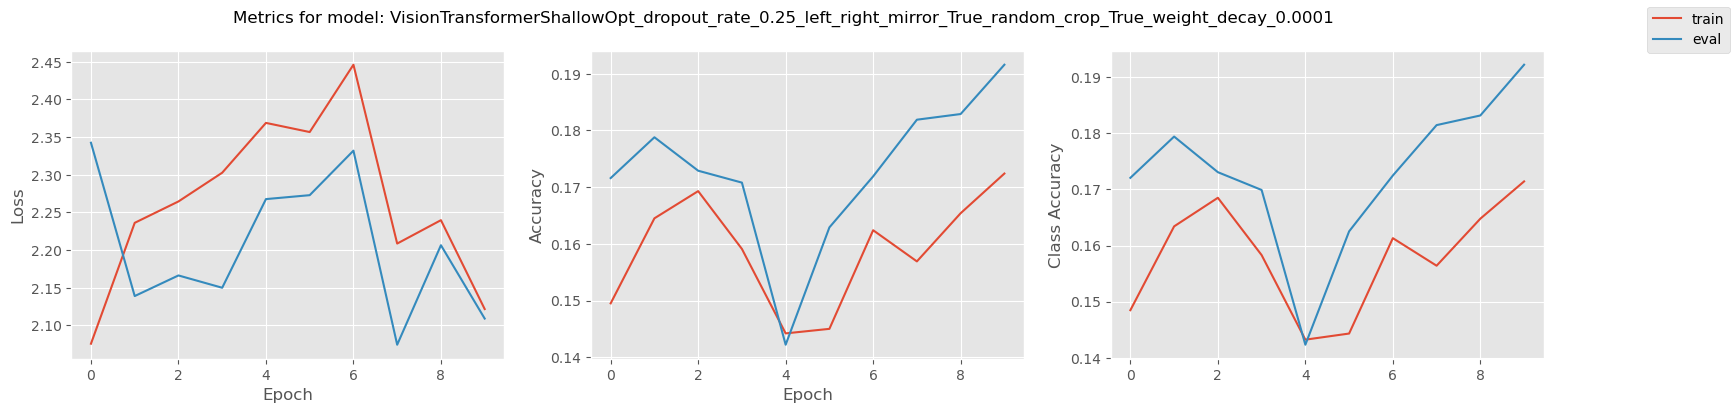

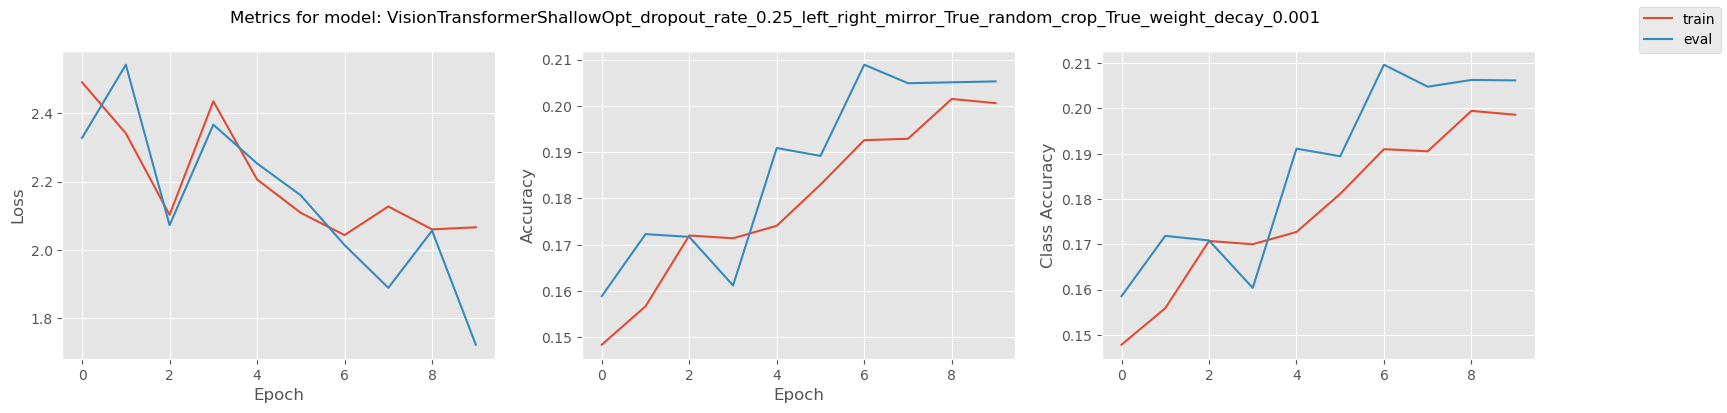

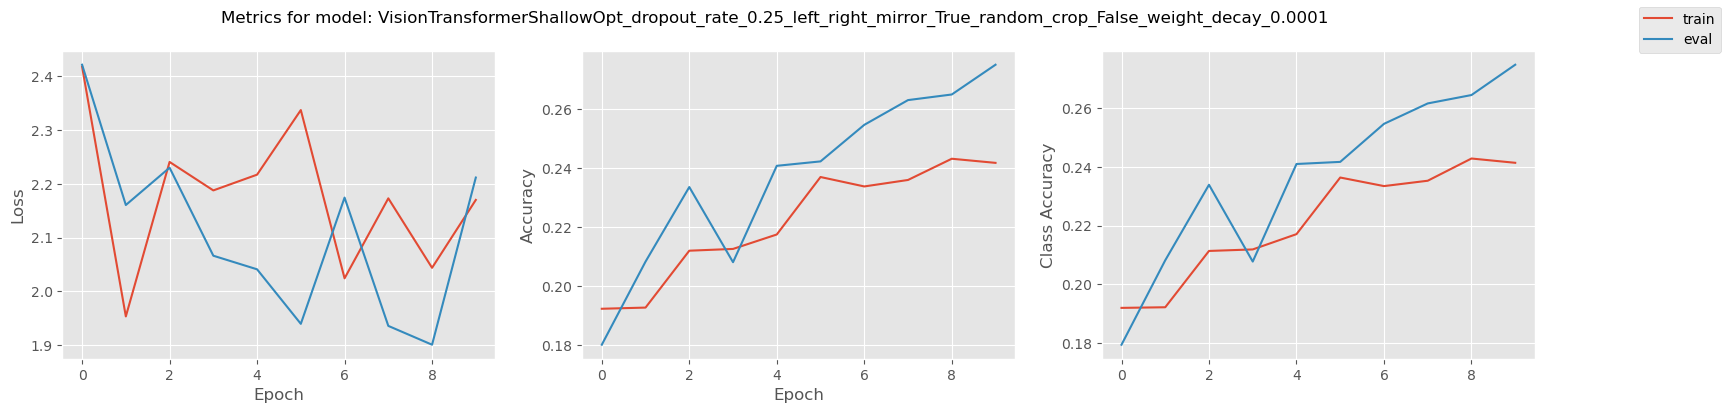

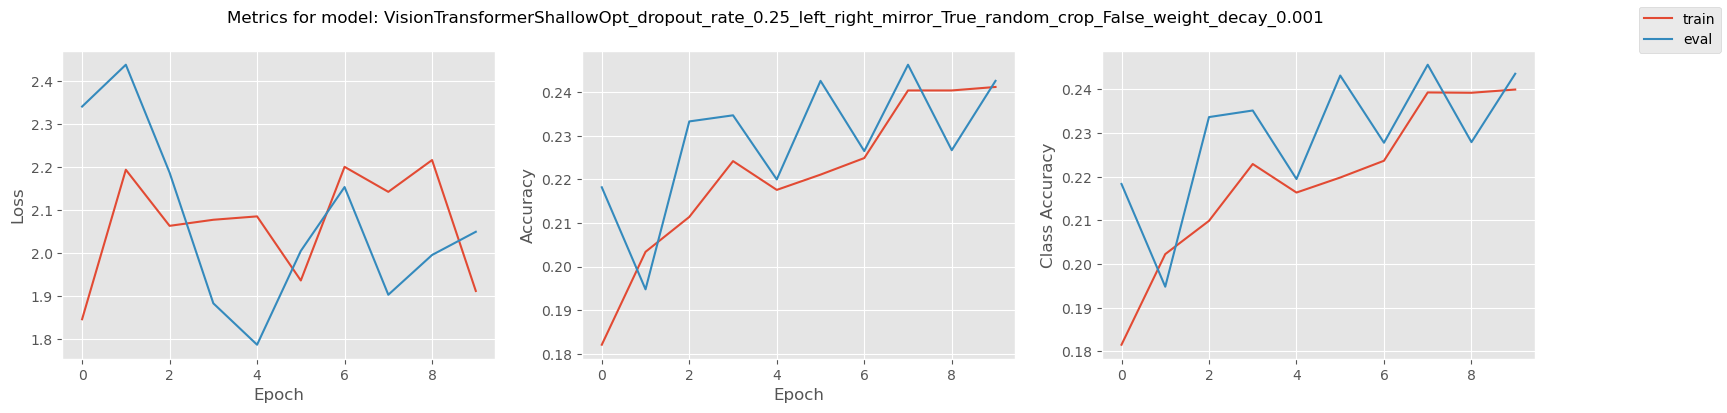

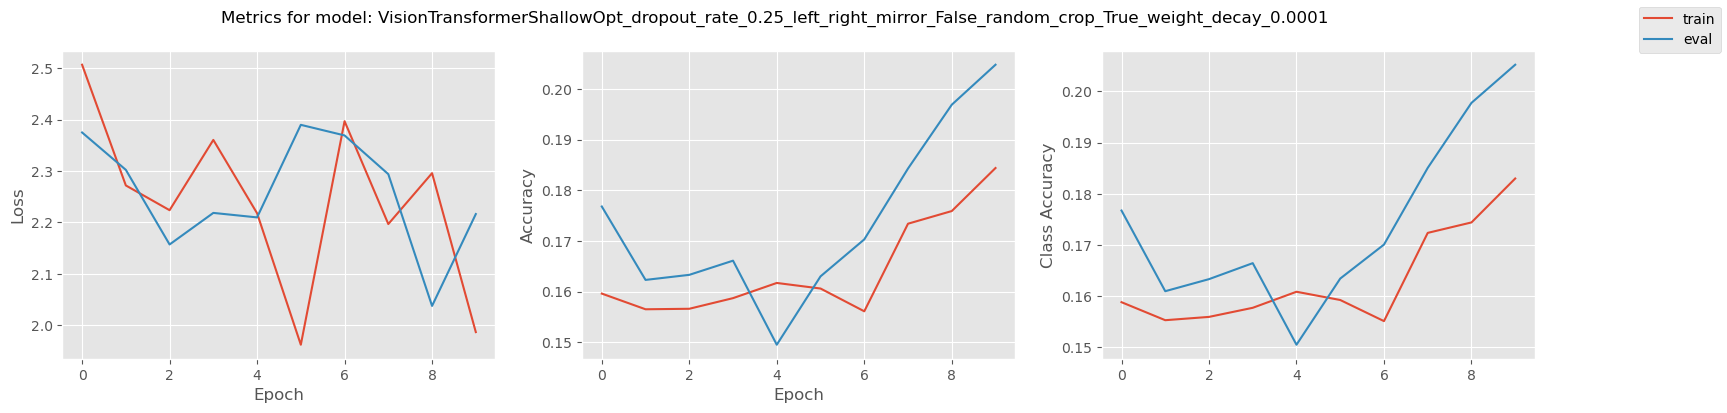

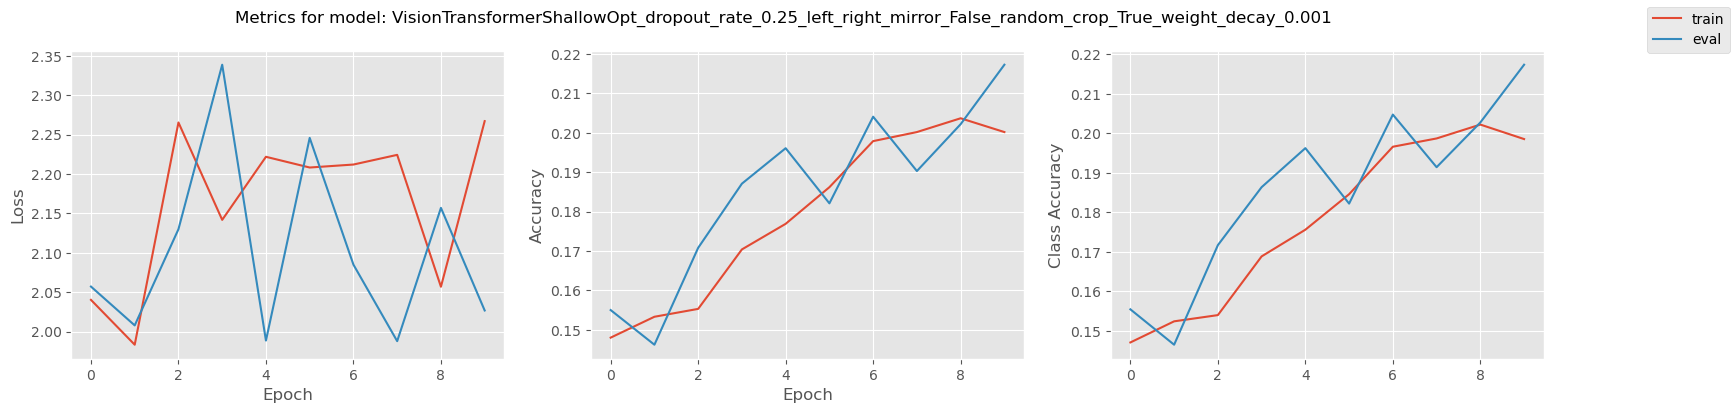

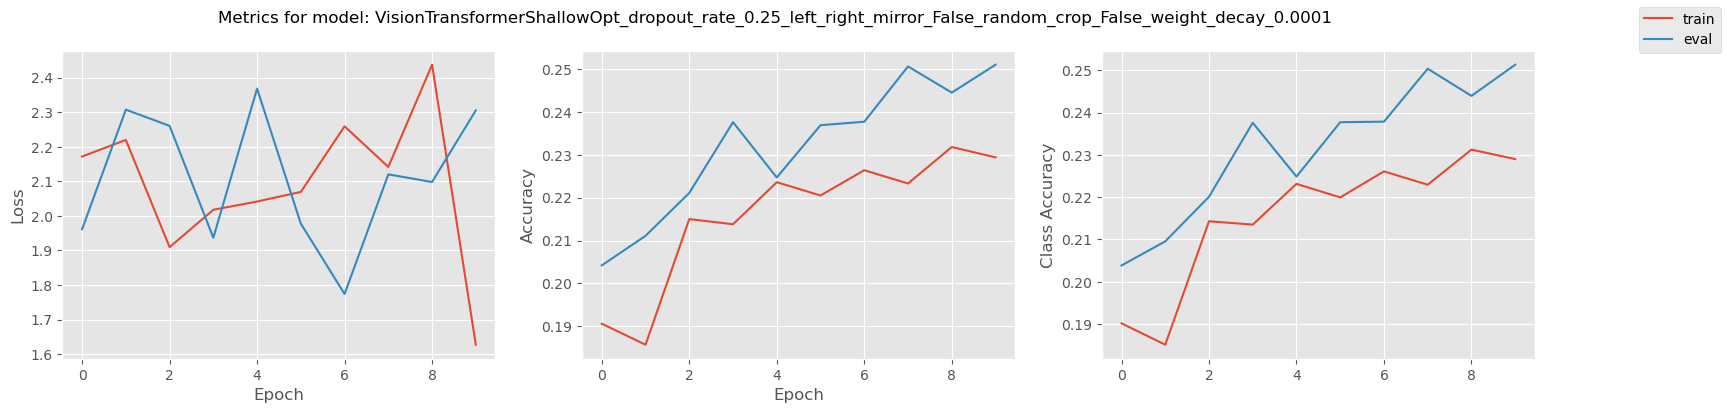

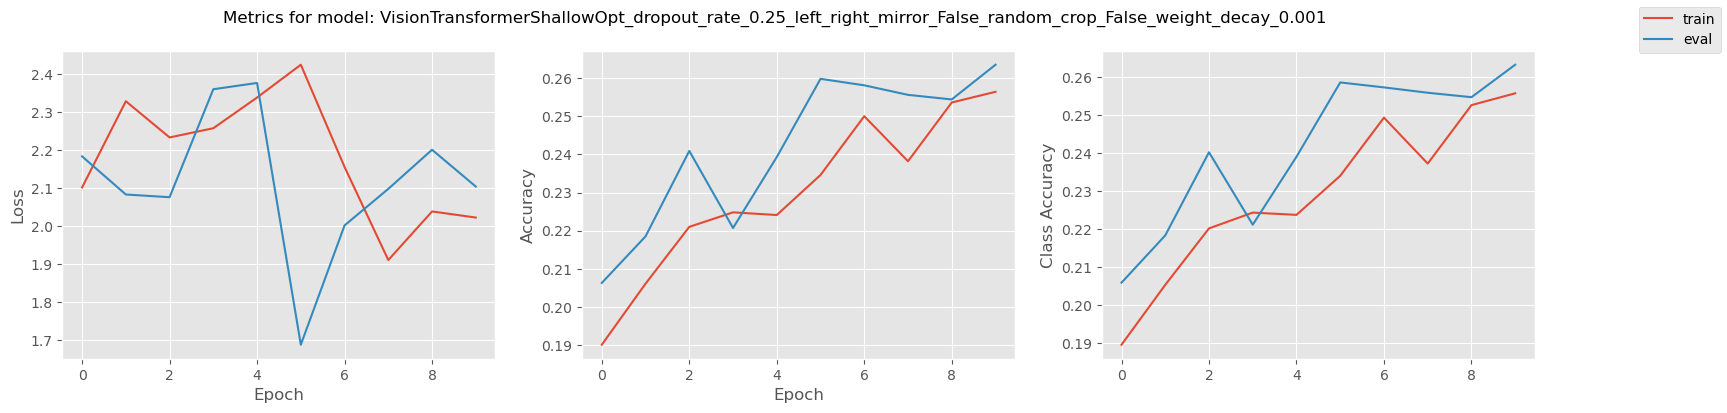

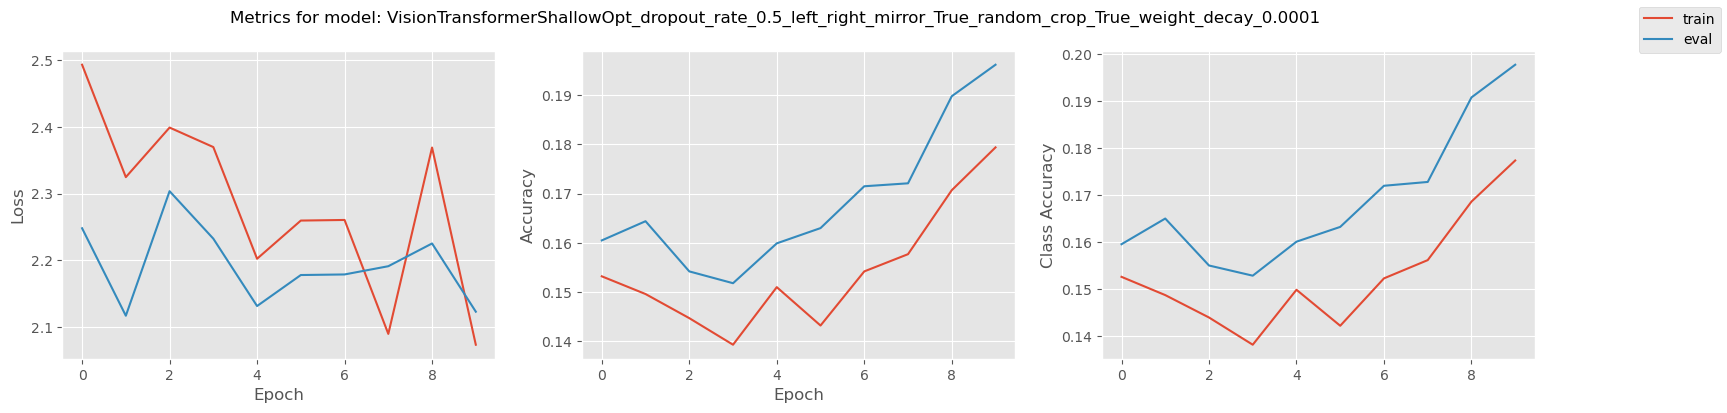

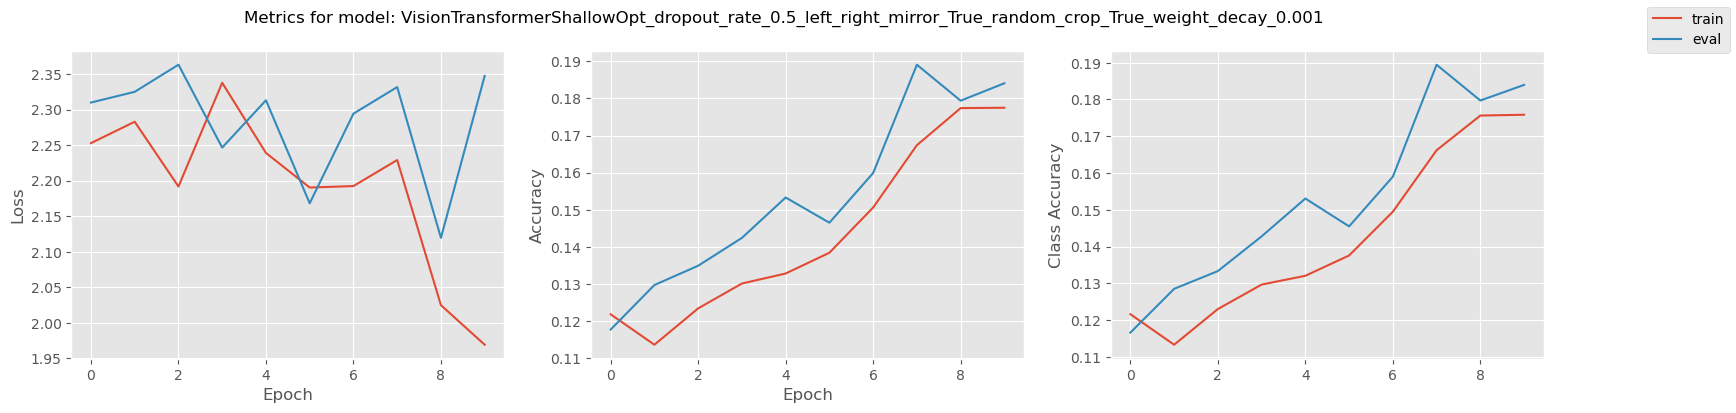

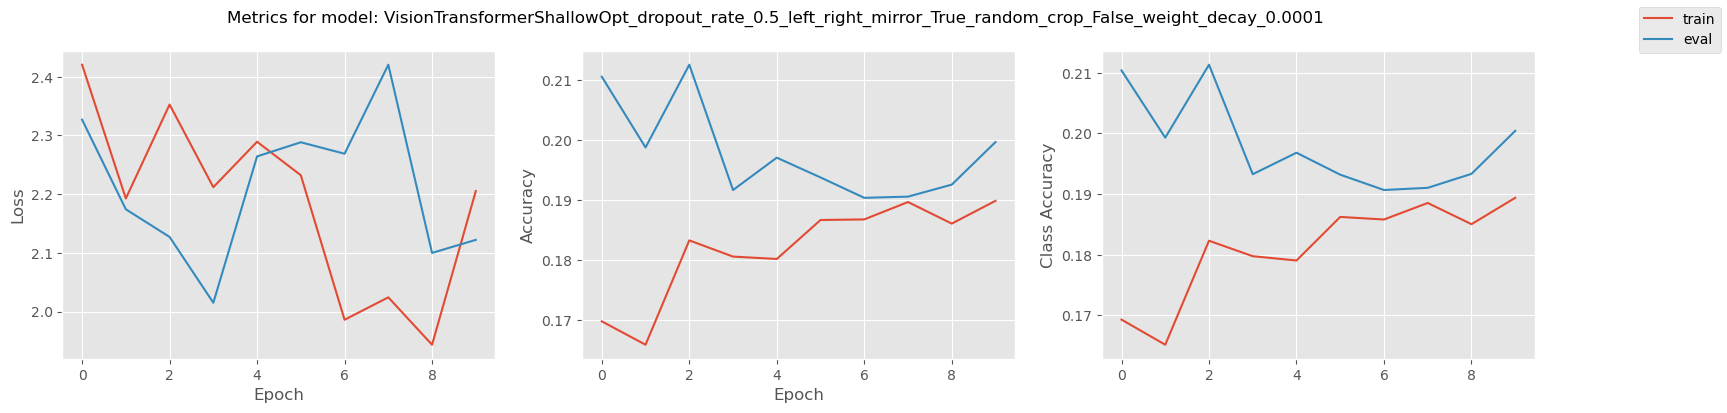

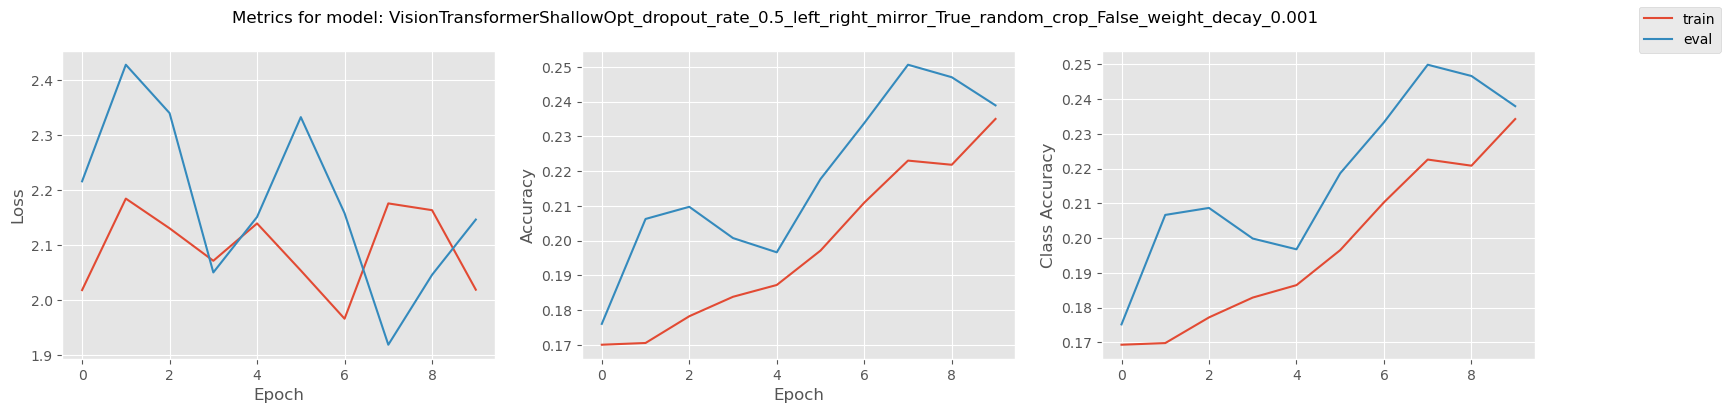

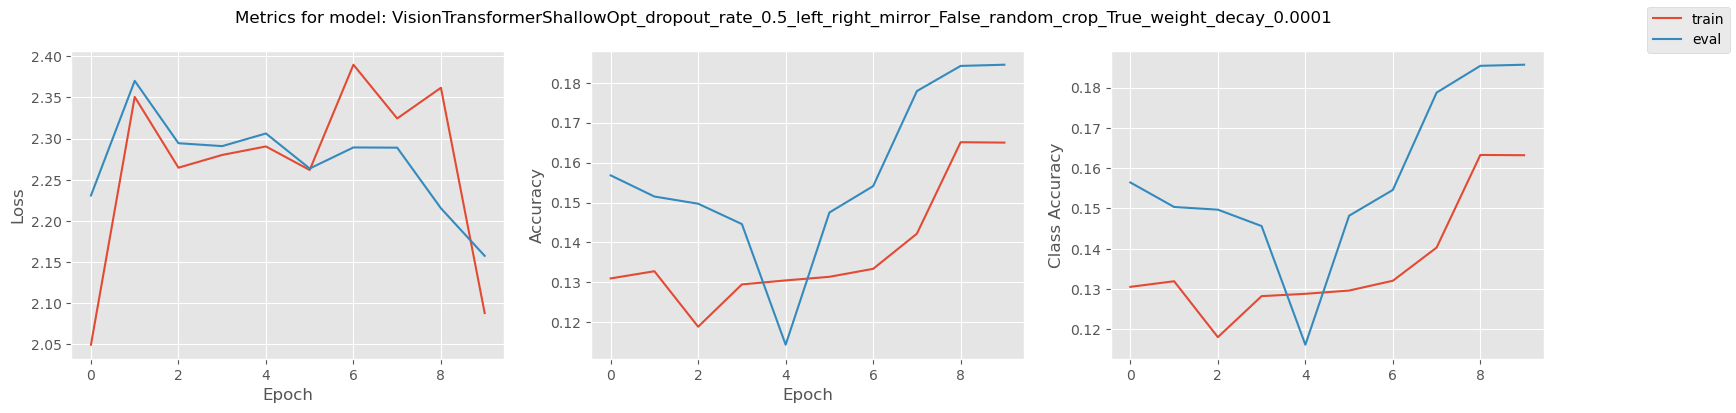

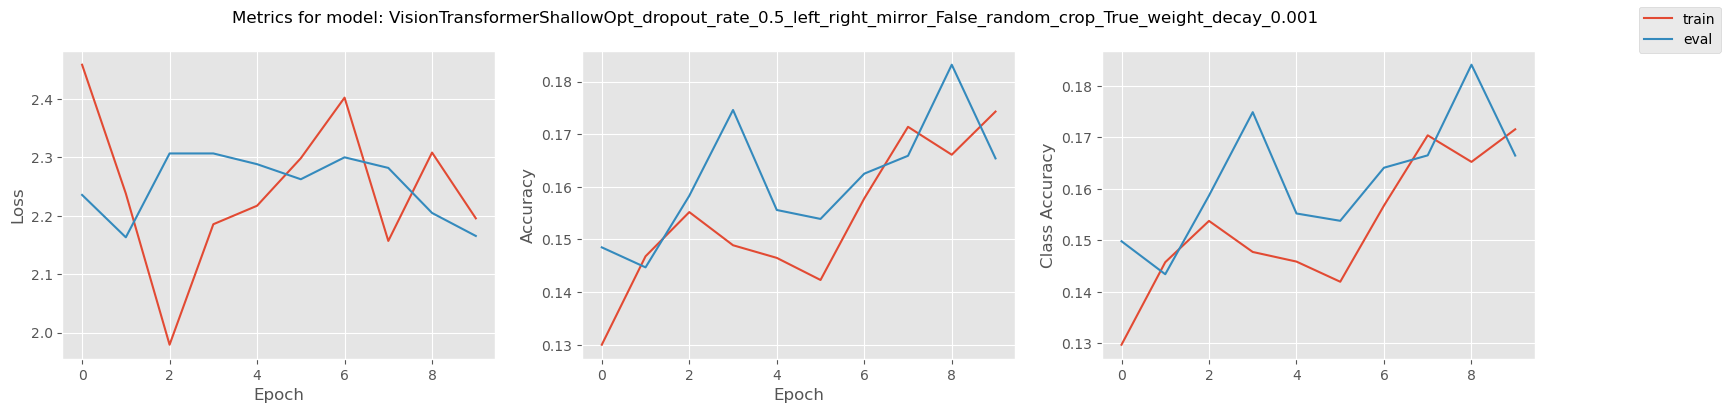

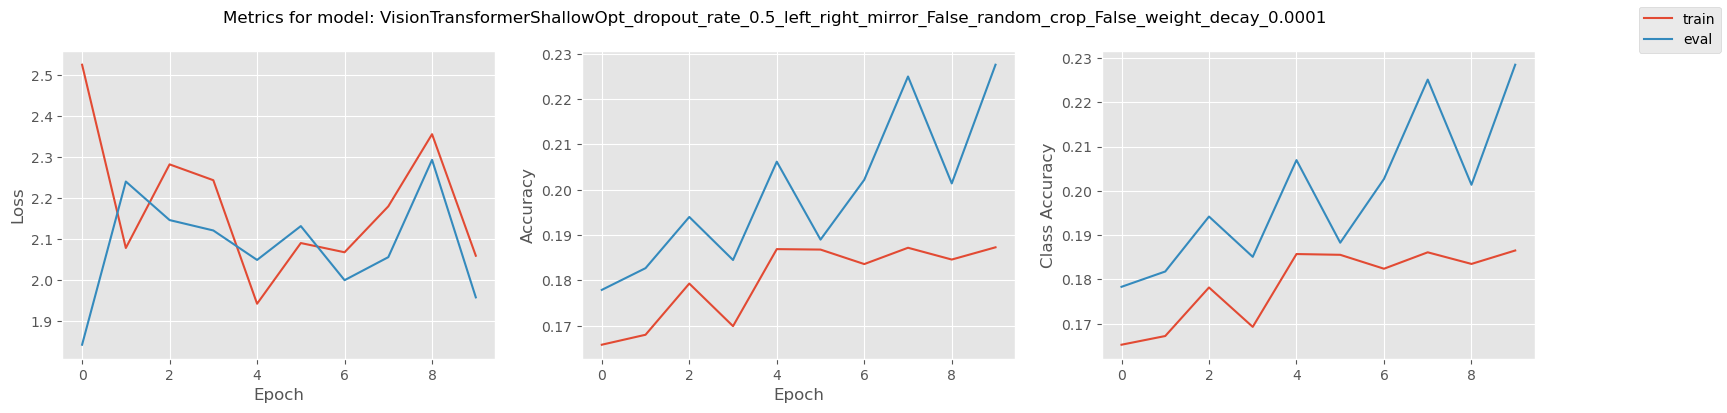

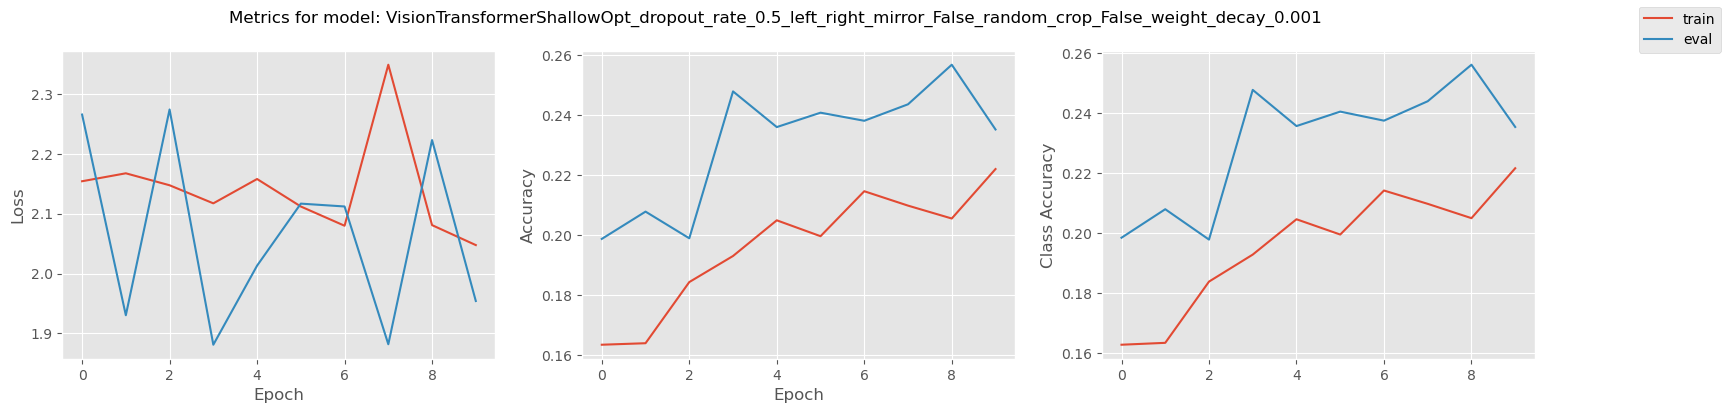

In [3]:
# Perform grid search for hyperparameter optimization

param_grid = {
    'random_crop': [True, False],
    'left_right_mirror': [True, False],
    'dropout_rate': [0.25, 0.5],
    'weight_decay': [0.0001, 0.001]
}

best_model_name = None
best_model = None
best_model_accuracy = 0.0
best_parameters = None

for i, params in enumerate(ParameterGrid(param_grid)):
        
    if params['random_crop'] == True and params['left_right_mirror'] == True:
        transform = v2.Compose([
            v2.ToImage(), 
            v2.RandomHorizontalFlip(),
            v2.RandomCrop(32, padding=4),
            v2.ToDtype(torch.float32, scale=True),
            v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
        ])
    elif params['random_crop'] == True and params['left_right_mirror'] == False:
        transform = v2.Compose([
            v2.ToImage(), 
            v2.RandomCrop(32, padding=4),
            v2.ToDtype(torch.float32, scale=True),
            v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
        ])
    elif params['random_crop'] == False and params['left_right_mirror'] == True:
        transform = v2.Compose([
            v2.ToImage(), 
            v2.RandomHorizontalFlip(),
            v2.ToDtype(torch.float32, scale=True),
            v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
        ])
    else:
        transform = v2.Compose([
            v2.ToImage(),
            v2.ToDtype(torch.float32, scale=True),
            v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
        ])

    train_data_opt, val_data_opt, test_data_opt = cifar_load(transform)

    model = VisionTransformerShallowOpt(dropout_rate=params['dropout_rate'])

    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=params['weight_decay'])

    print(f'\n\n{i+1}/{len(ParameterGrid(param_grid))} Training model with hyperparameters: {params}')

    name = model.__class__.__name__

    for param in params:
        name += "_"+param + "_" + str(params[param])

    trainer = train_model_opt(model, optimizer, name, train_data_opt, val_data_opt)

    trainer.train()

    save_metrics(trainer, model.__class__.__name__, params)

    model, test_metric = test_model(model, params, test_data_opt)

    plot_metrics(trainer, name)


    if test_metric.accuracy() > best_model_accuracy:
        best_model_accuracy = test_metric.accuracy()
        best_parameters = params
        best_model = model
        best_model_name = name

print("Model:", best_model_name)
print("Best model found with parameters:", best_parameters)
print("Best test accuracy:", best_model_accuracy)



1/16 Training model with hyperparameters: {'dropout_rate': 0.25, 'left_right_mirror': True, 'random_crop': True, 'weight_decay': 0.0001}

Training model:  VisionTransformerDeepOpt

TRAIN, EPOCH: 0 
Loss: 2.29897403717041
Accuracy: 0.1027
Class Accuracy: 0.10198229663074017

VALIDATION, EPOCH: 0 
Loss: 2.2937633991241455
Accuracy: 0.0977
Class Accuracy: 0.1
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH: 1 
Loss: 2.3026070594787598
Accuracy: 0.1007
Class Accuracy: 0.09967516716569662

VALIDATION, EPOCH: 1 
Loss: 2.3008179664611816
Accuracy: 0.0977
Class Accuracy: 0.1
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH: 2 
Loss: 2.300724506378174
Accuracy: 0.0993
Class Accuracy: 0.09654639437794685

VALIDATION, EPOCH: 2 
Loss: 2.284780502319336
Accuracy: 0.1014
Class Accuracy: 0.1
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH: 3 
Loss: 

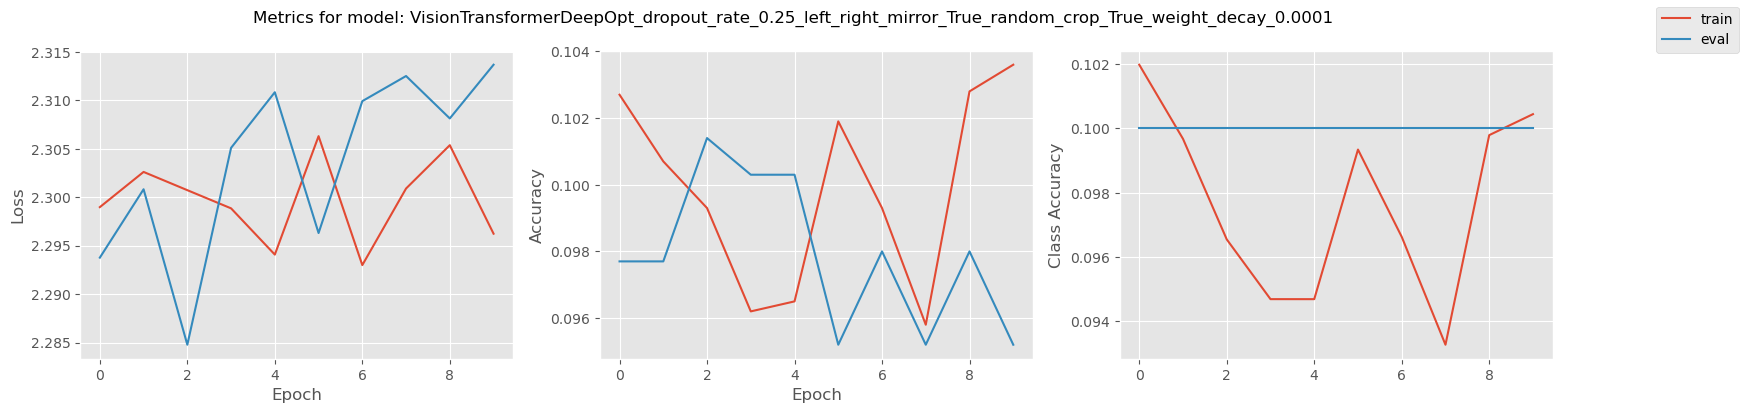

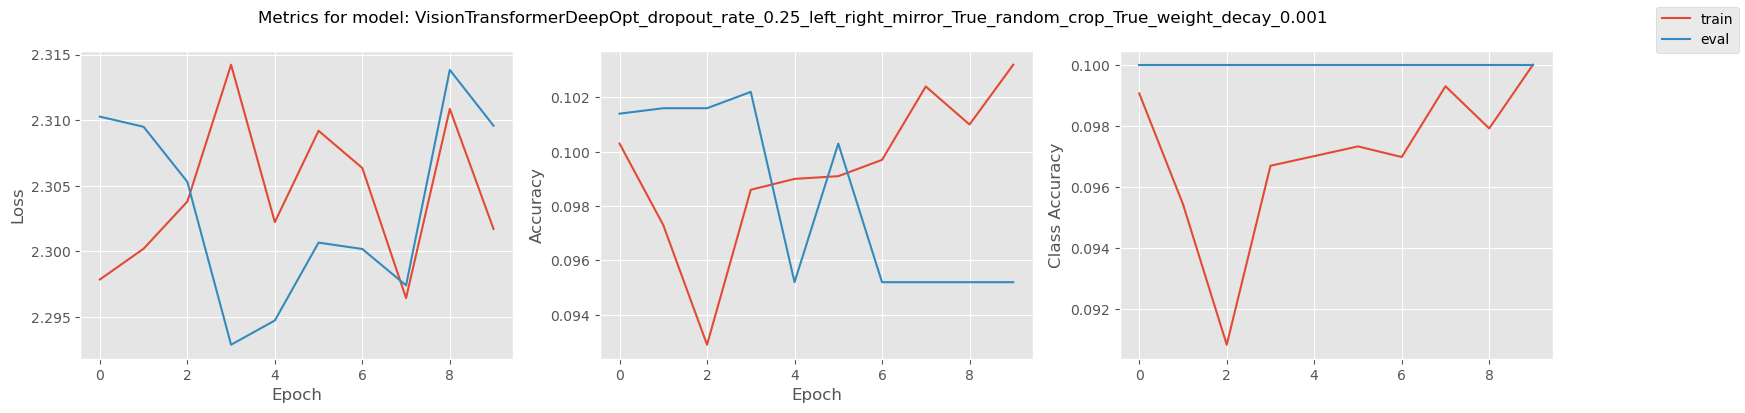

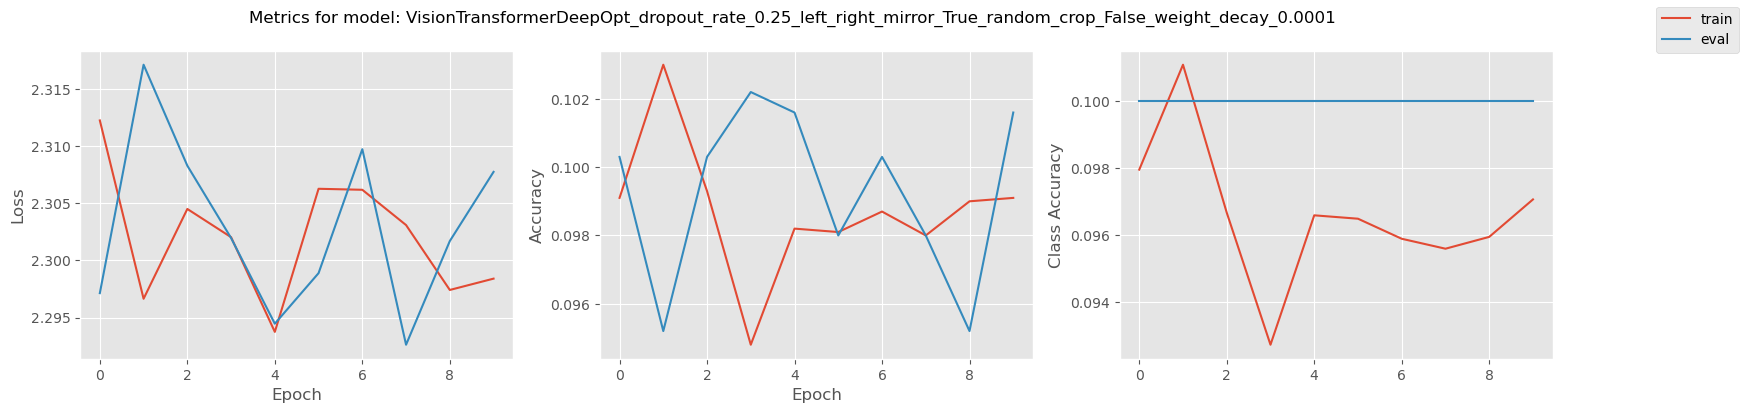

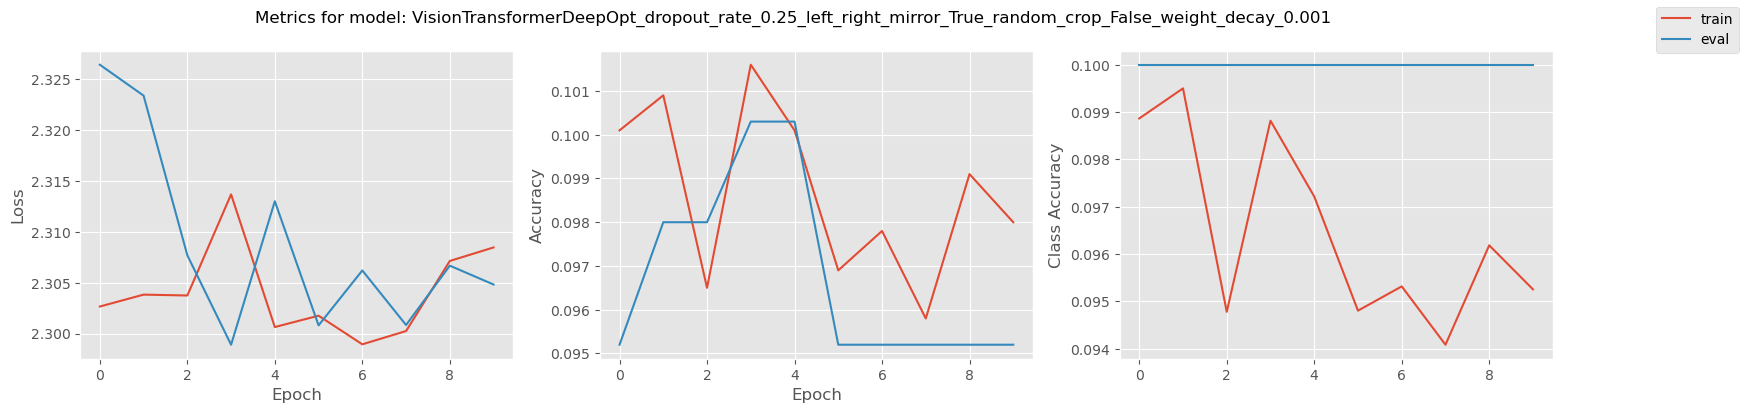

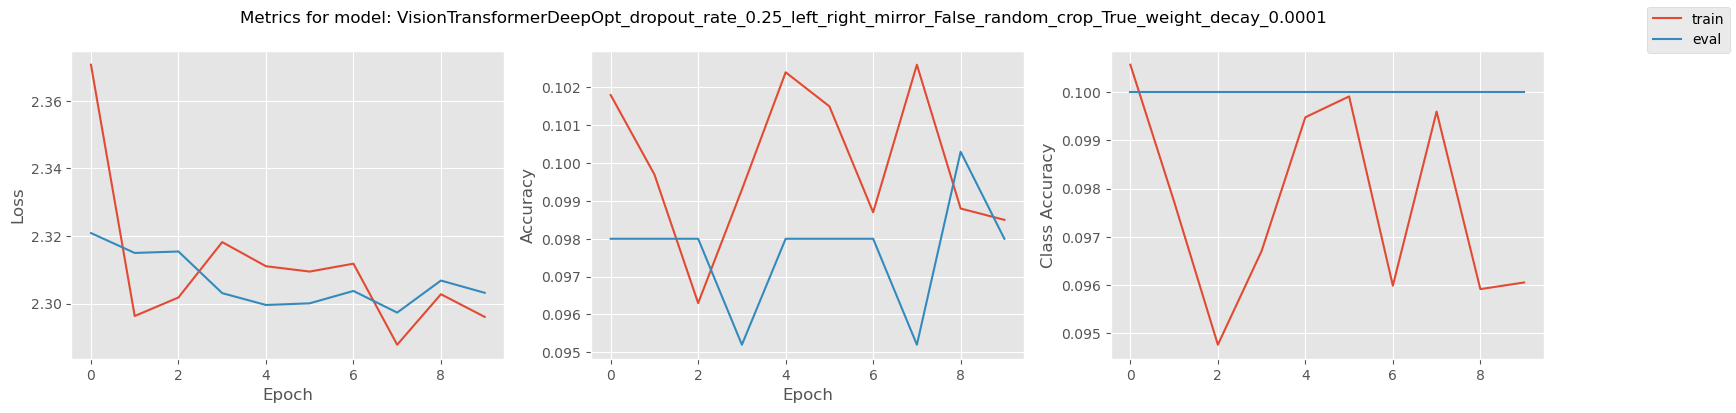

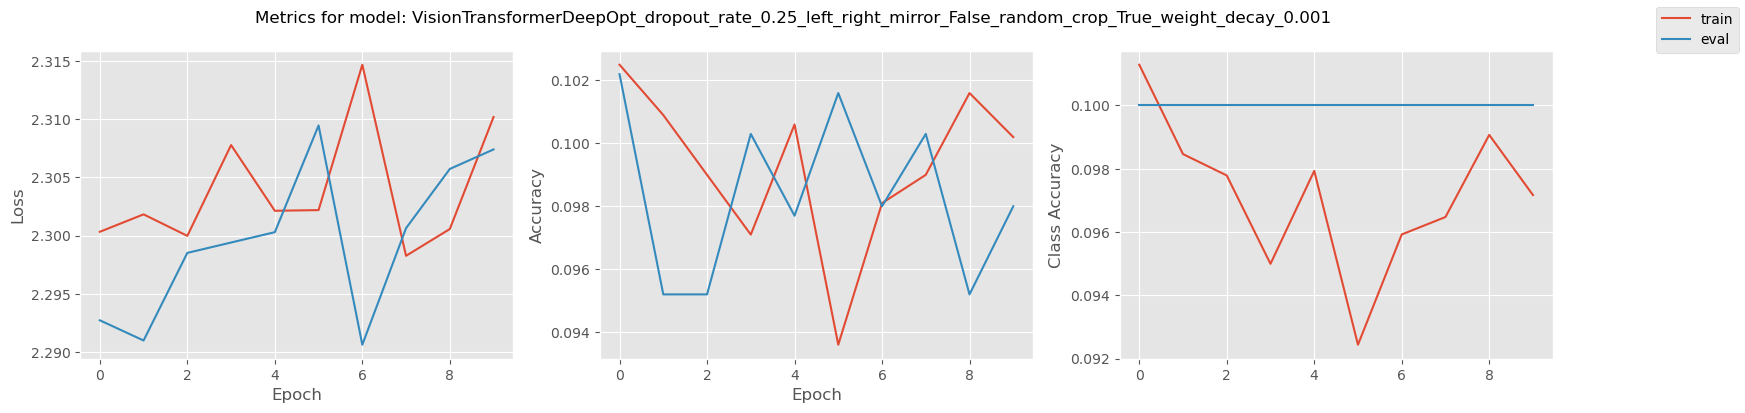

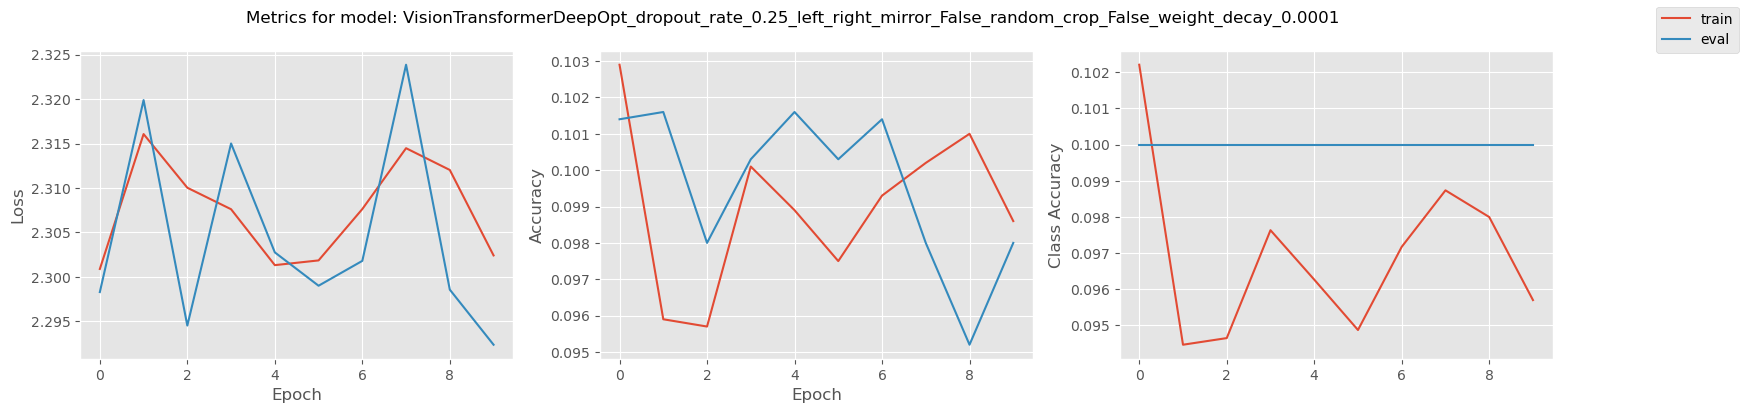

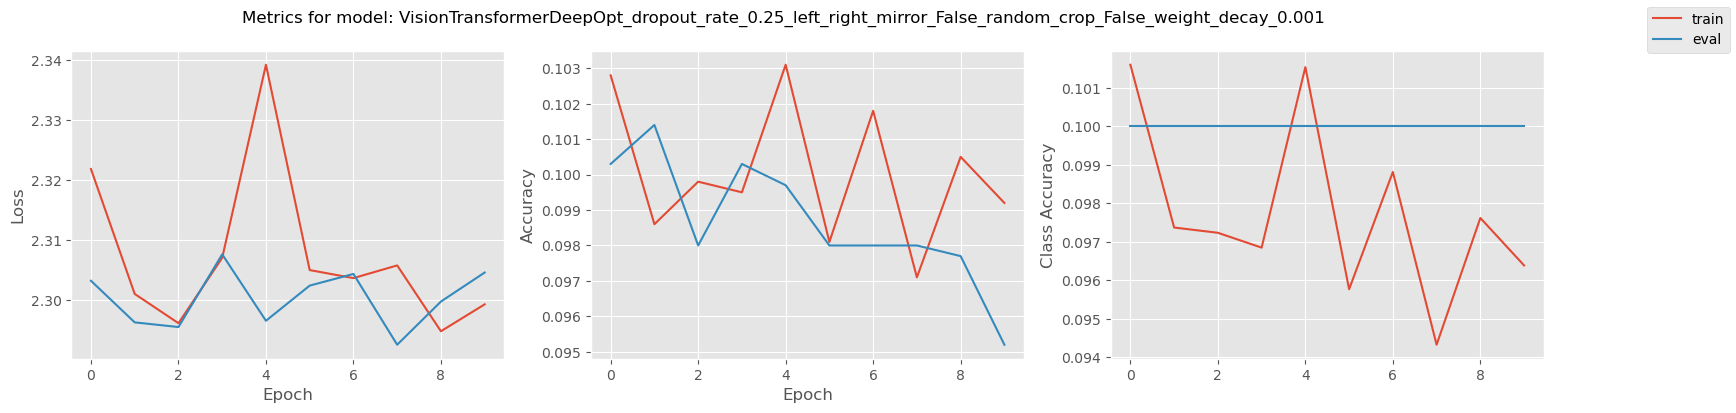

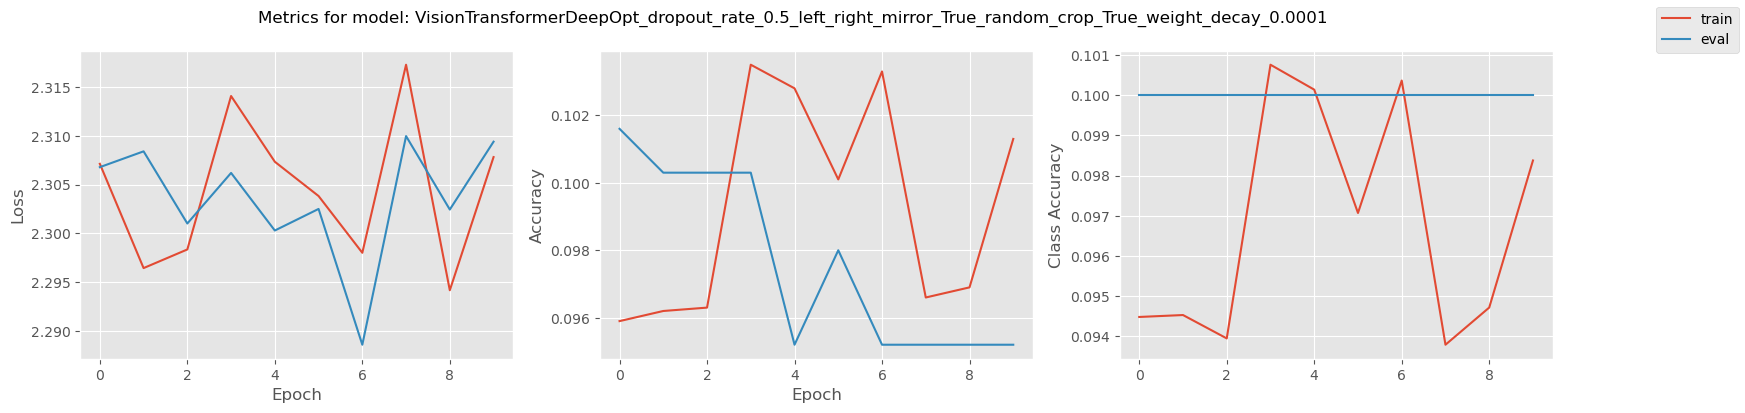

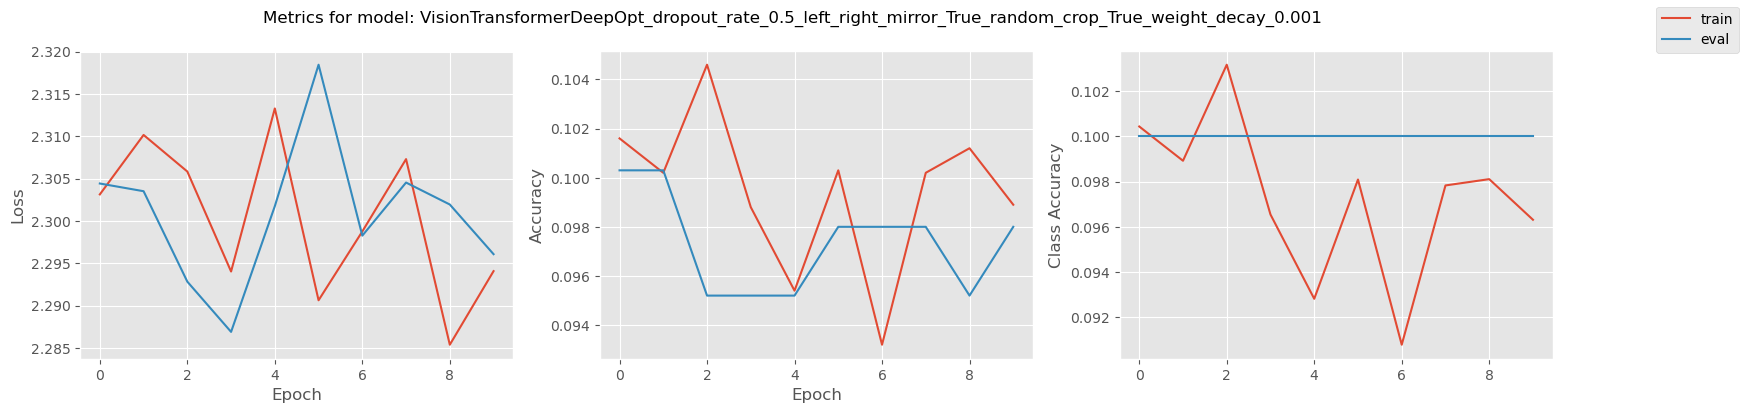

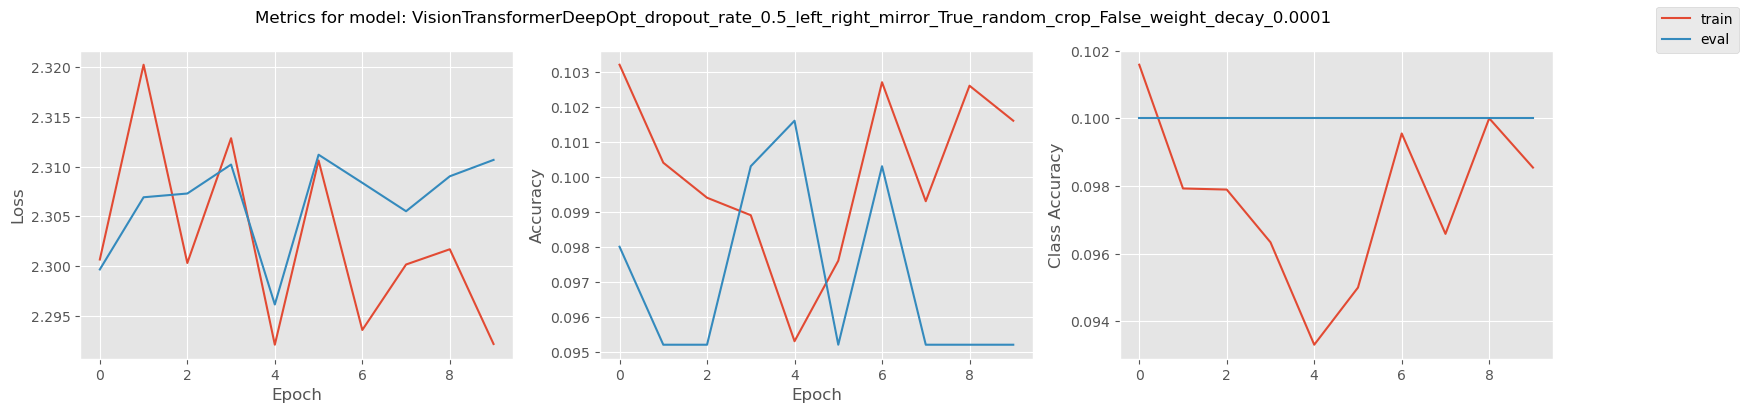

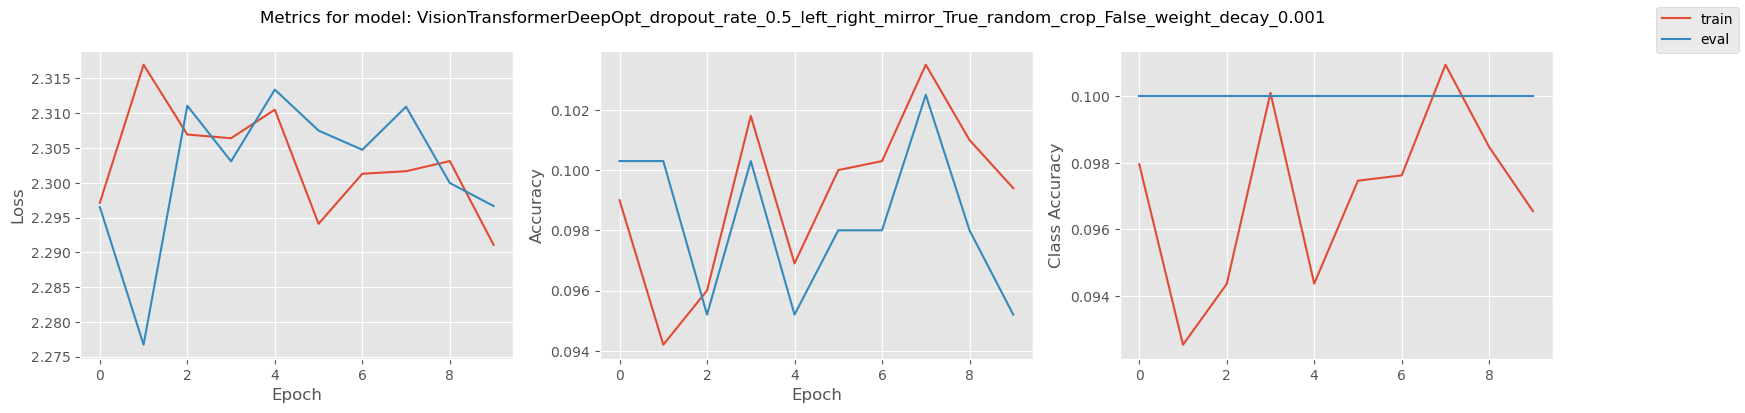

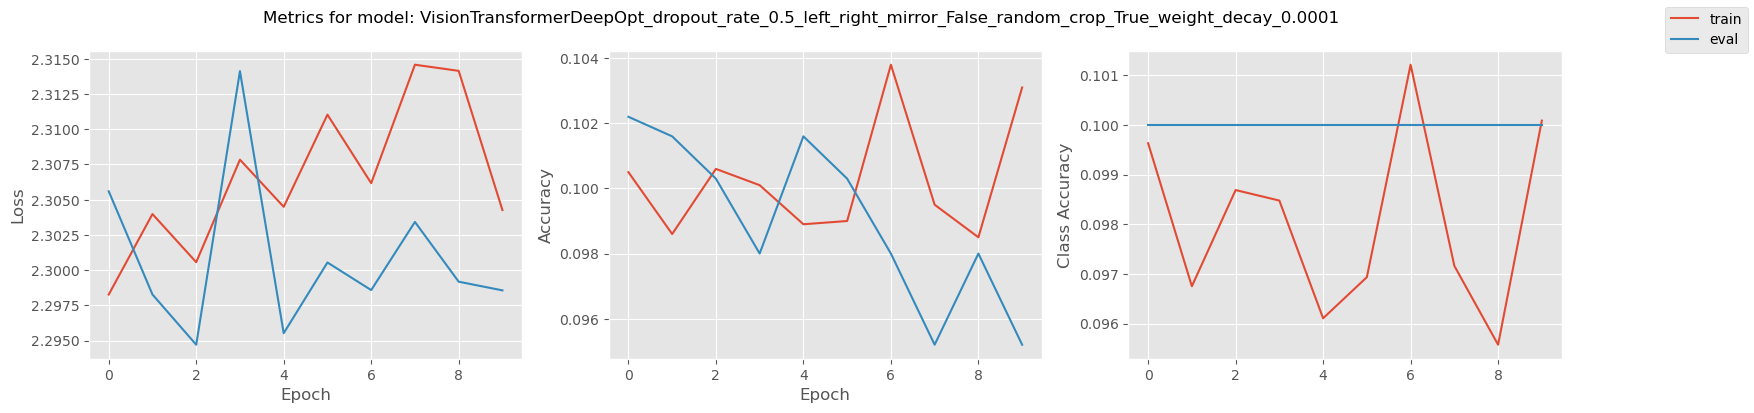

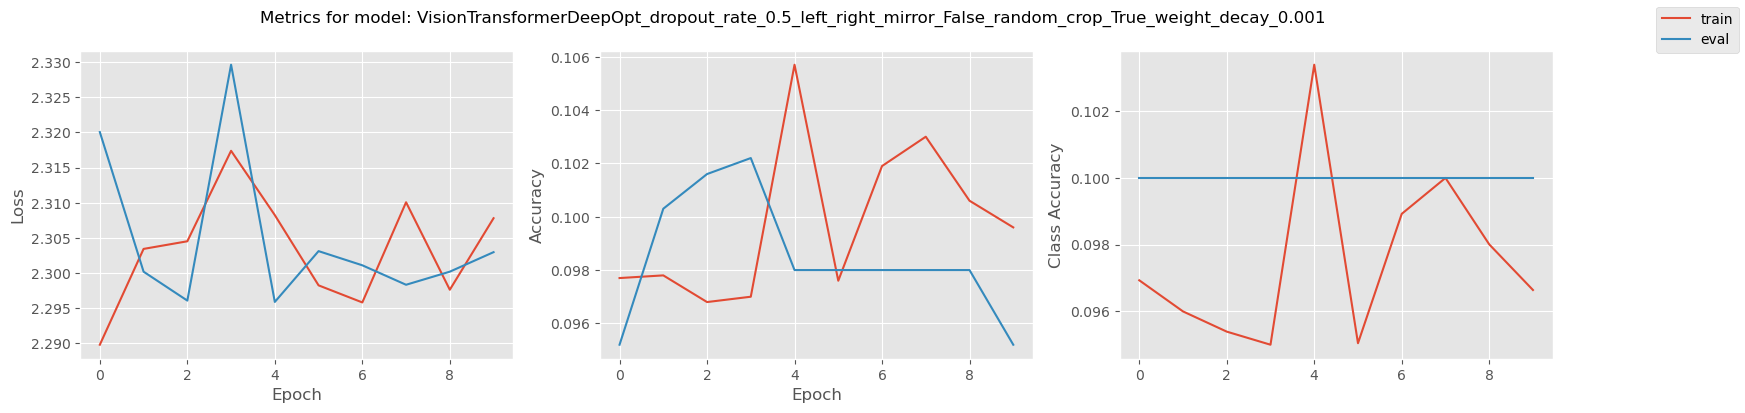

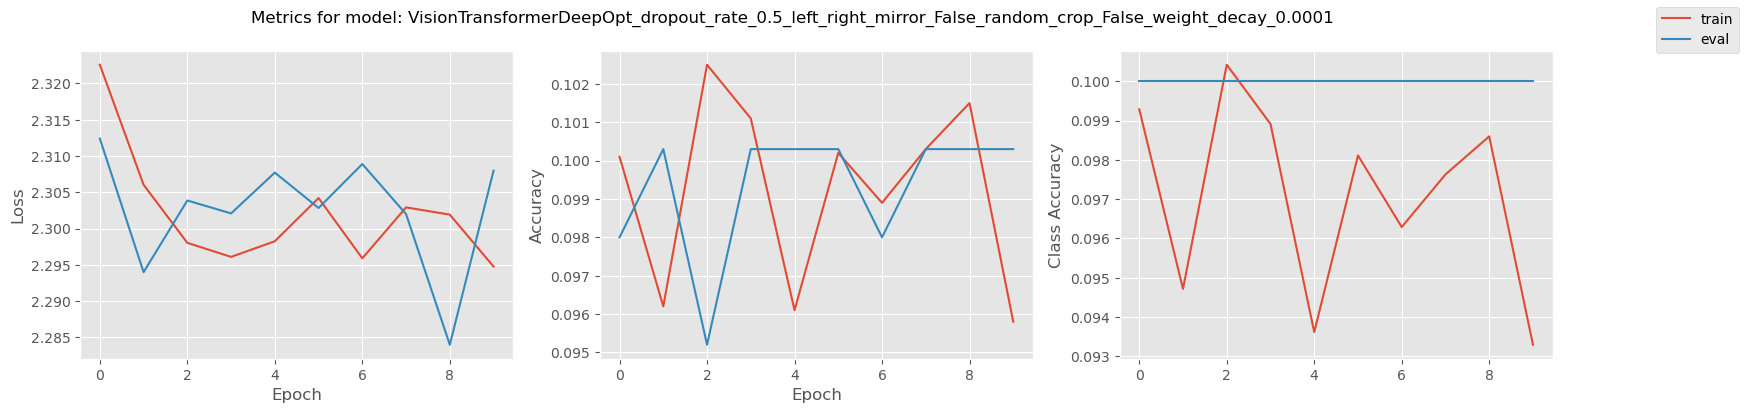

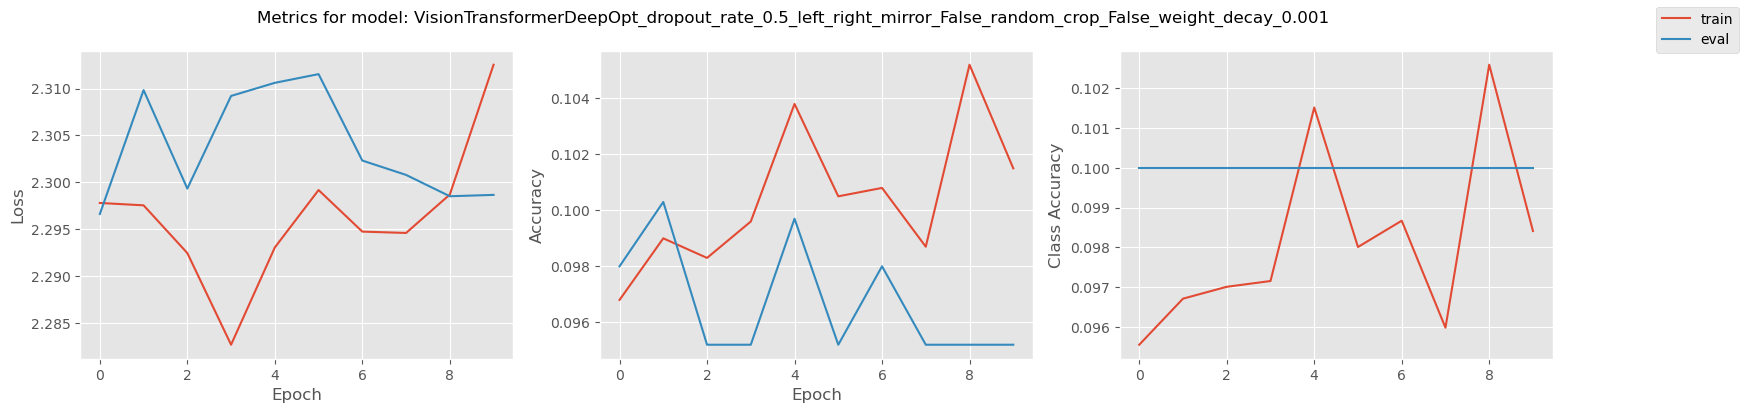

In [4]:
# Perform grid search for hyperparameter optimization

best_model_name = None
best_model = None
best_model_accuracy = 0.0
best_parameters = None


for i, params in enumerate(ParameterGrid(param_grid)):
        
    if params['random_crop'] == True and params['left_right_mirror'] == True:
        transform = v2.Compose([
            v2.ToImage(), 
            v2.RandomHorizontalFlip(),
            v2.RandomCrop(32, padding=4),
            v2.ToDtype(torch.float32, scale=True),
            v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
        ])
    elif params['random_crop'] == True and params['left_right_mirror'] == False:
        transform = v2.Compose([
            v2.ToImage(), 
            v2.RandomCrop(32, padding=4),
            v2.ToDtype(torch.float32, scale=True),
            v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
        ])
    elif params['random_crop'] == False and params['left_right_mirror'] == True:
        transform = v2.Compose([
            v2.ToImage(), 
            v2.RandomHorizontalFlip(),
            v2.ToDtype(torch.float32, scale=True),
            v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
        ])
    else:
        transform = v2.Compose([
            v2.ToImage(),
            v2.ToDtype(torch.float32, scale=True),
            v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
        ])

    train_data_opt, val_data_opt, test_data_opt = cifar_load(transform)

    model = VisionTransformerDeepOpt(dropout_rate=params['dropout_rate'])

    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=params['weight_decay'])

    print(f'\n\n{i+1}/{len(ParameterGrid(param_grid))} Training model with hyperparameters: {params}')

    name = model.__class__.__name__

    for param in params:
        name += "_"+param + "_" + str(params[param])

    trainer = train_model_opt(model, optimizer, name, train_data_opt, val_data_opt)

    trainer.train()

    save_metrics(trainer, model.__class__.__name__, params)

    model, test_metric = test_model(model, params, test_data_opt)

    plot_metrics(trainer, name)

    if test_metric.accuracy() > best_model_accuracy:
        best_model_accuracy = test_metric.accuracy()
        best_parameters = params
        best_model = model
        best_model_name = name

print("Model:", best_model_name)
print("Best model found with parameters:", best_parameters)
print("Best test accuracy:", best_model_accuracy)




1/16 Training model with hyperparameters: {'dropout_rate': 0.25, 'left_right_mirror': True, 'random_crop': True, 'weight_decay': 0.0001}

Training model:  VisionTransformerDeepResidualOpt

TRAIN, EPOCH: 0 
Loss: 177.87533569335938
Accuracy: 0.178
Class Accuracy: 0.1778797447681427

VALIDATION, EPOCH: 0 
Loss: 234.14158630371094
Accuracy: 0.1815
Class Accuracy: 0.181728327088058
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH: 1 
Loss: 135.09803771972656
Accuracy: 0.2197
Class Accuracy: 0.21941948682069778

VALIDATION, EPOCH: 1 
Loss: 101.9277114868164
Accuracy: 0.2139
Class Accuracy: 0.21302654258906842
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH: 2 
Loss: 110.30329895019531
Accuracy: 0.2401
Class Accuracy: 0.2401625022292137

VALIDATION, EPOCH: 2 
Loss: 142.43545532226562
Accuracy: 0.2386
Class Accuracy: 0.23840096071362496
Best mean per class accuracy on validation data set is 

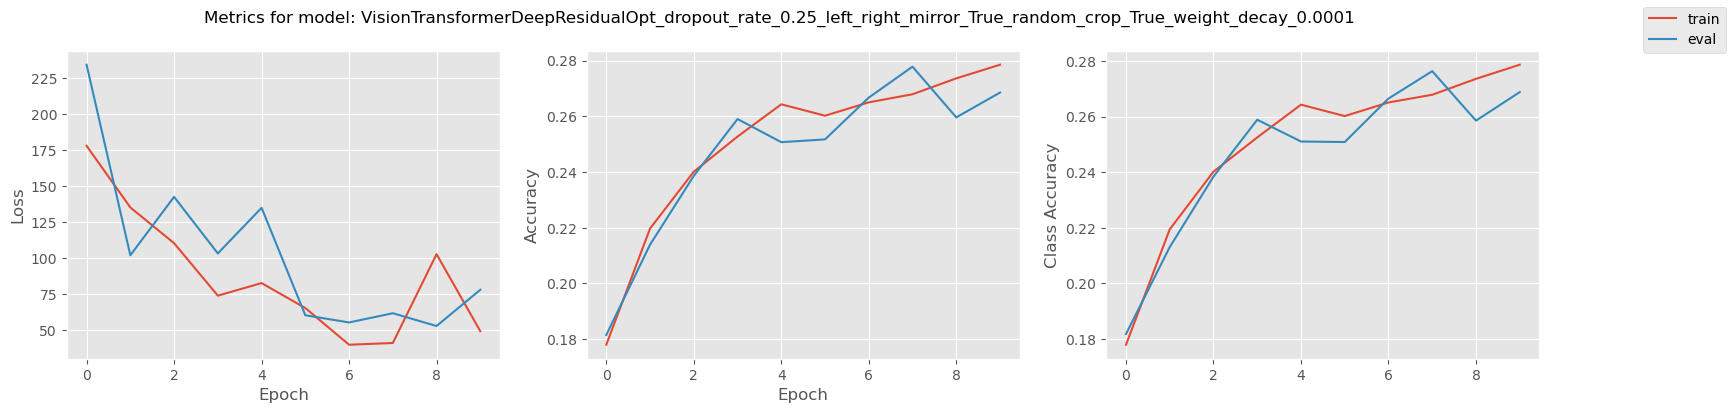

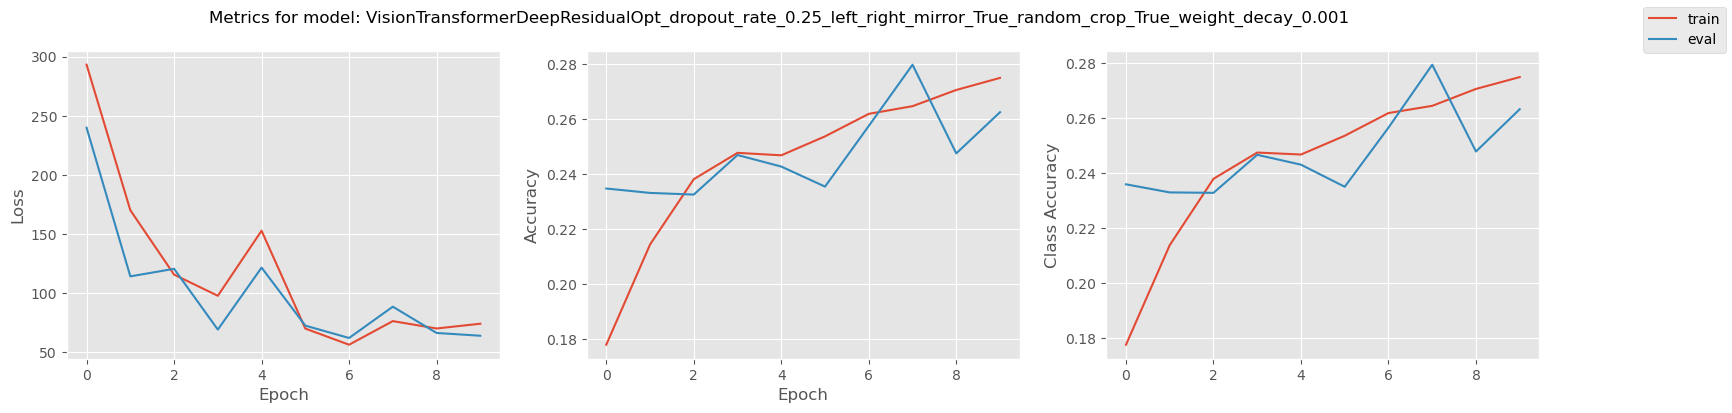

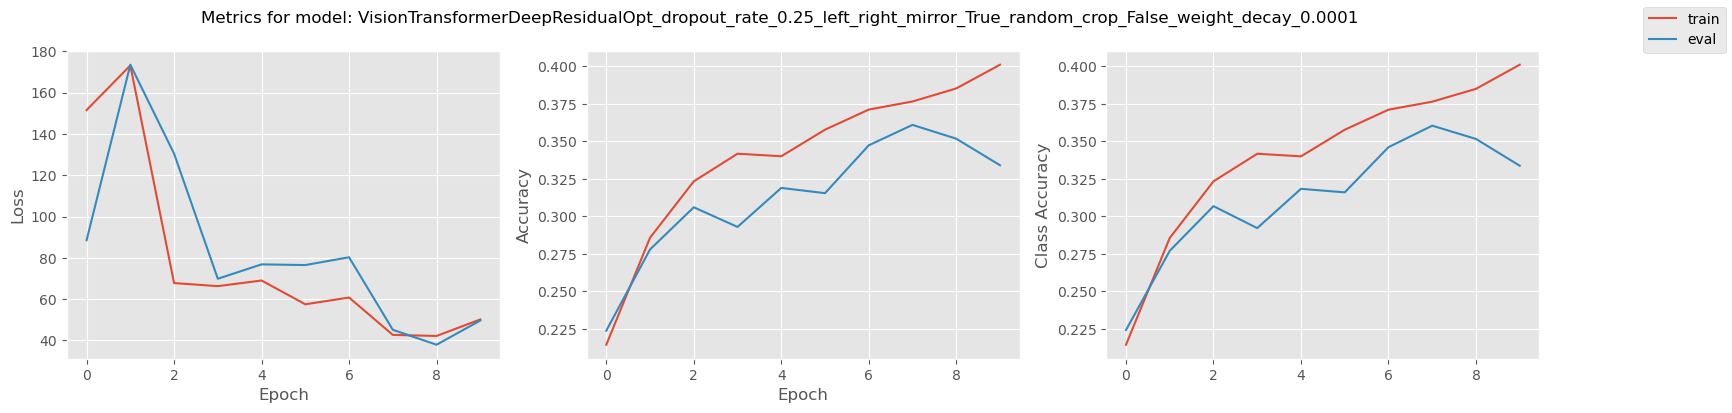

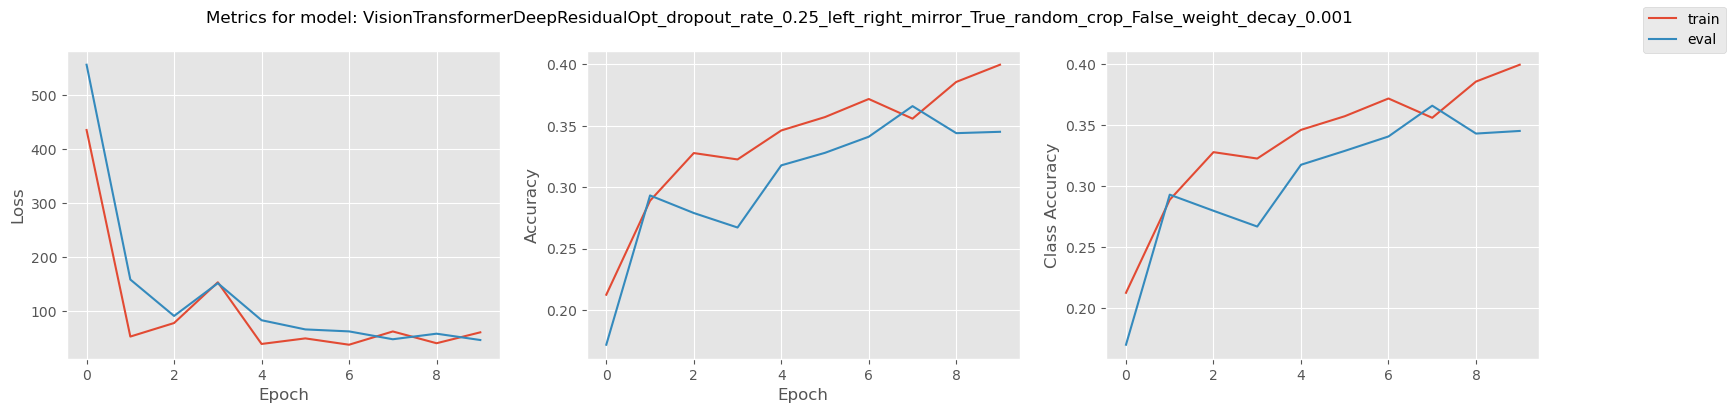

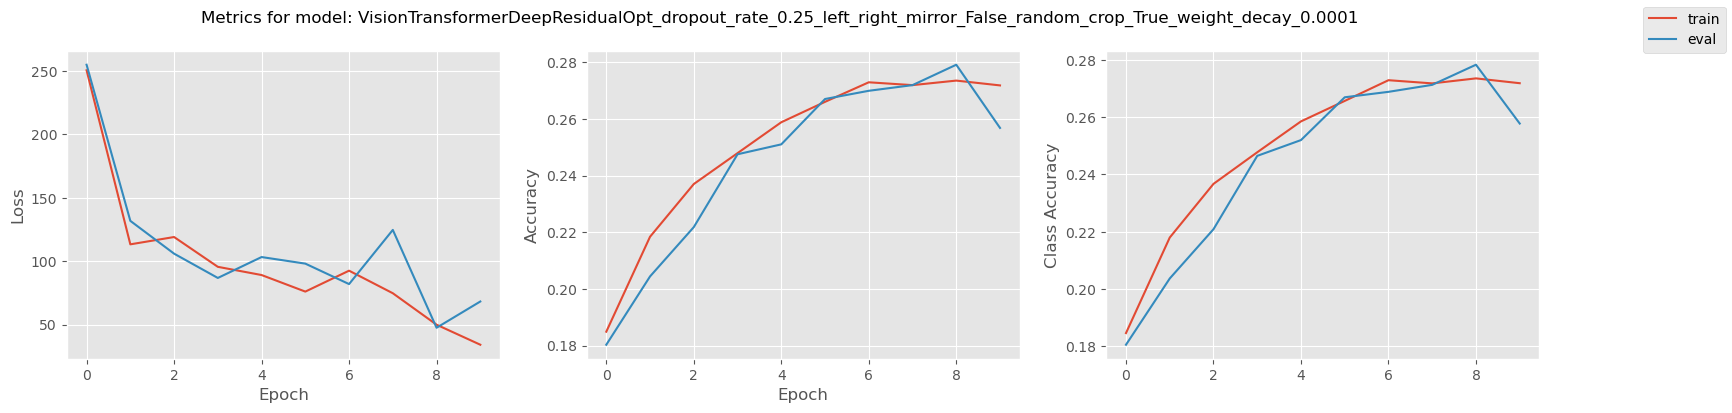

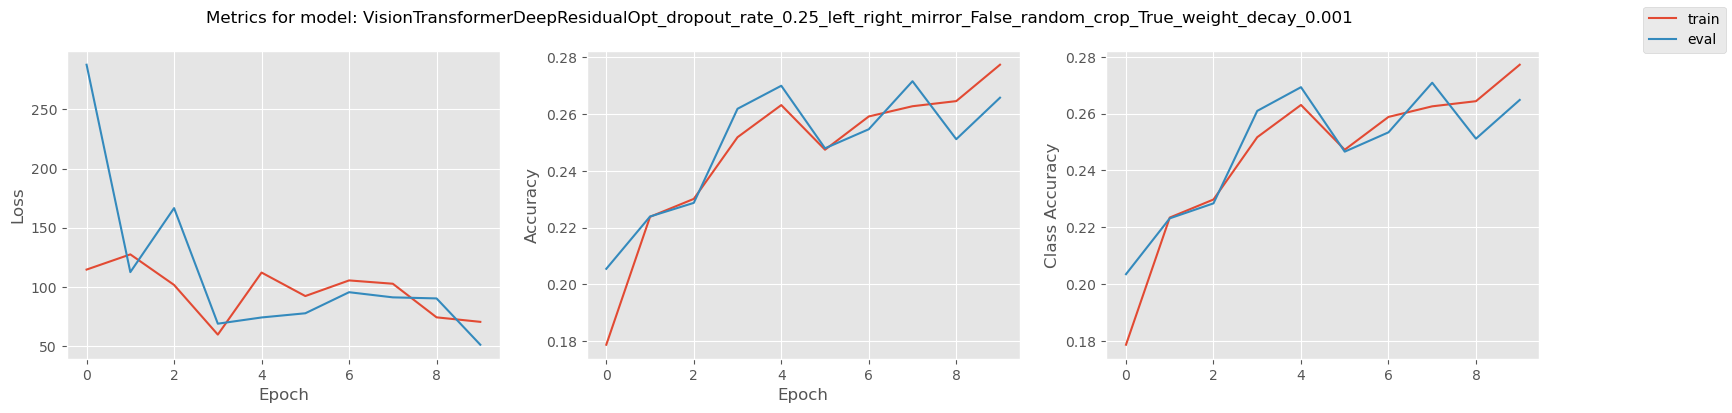

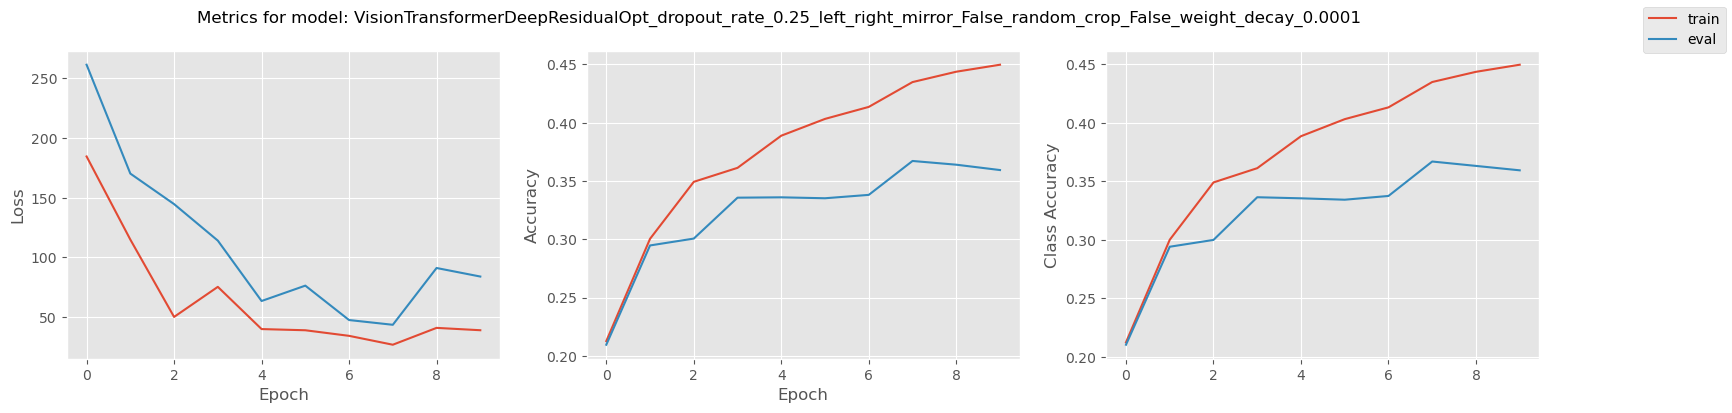

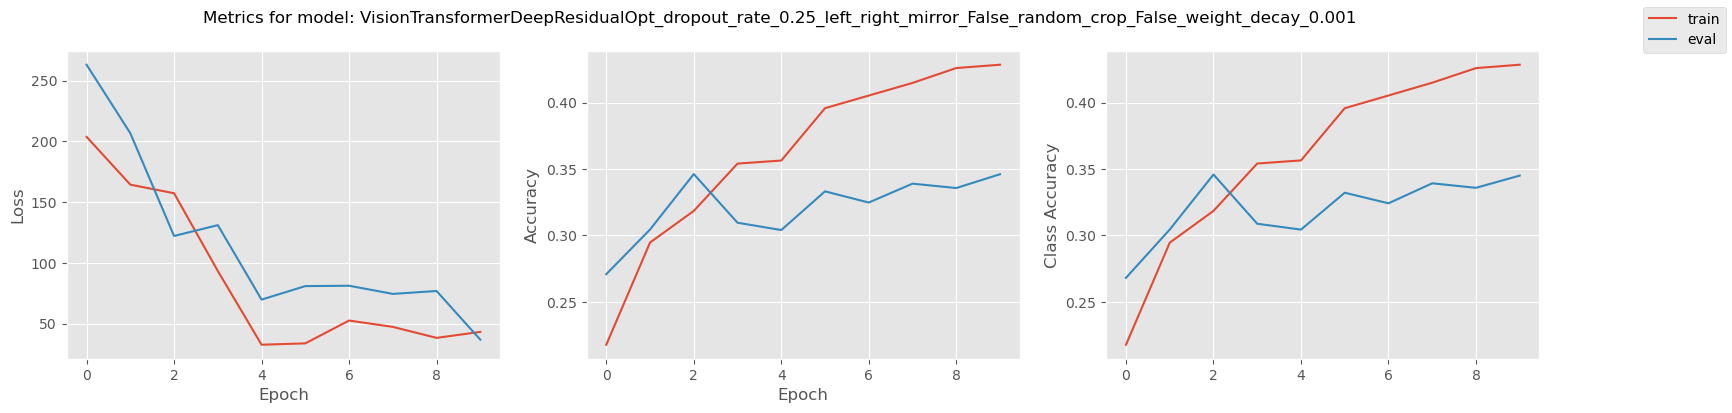

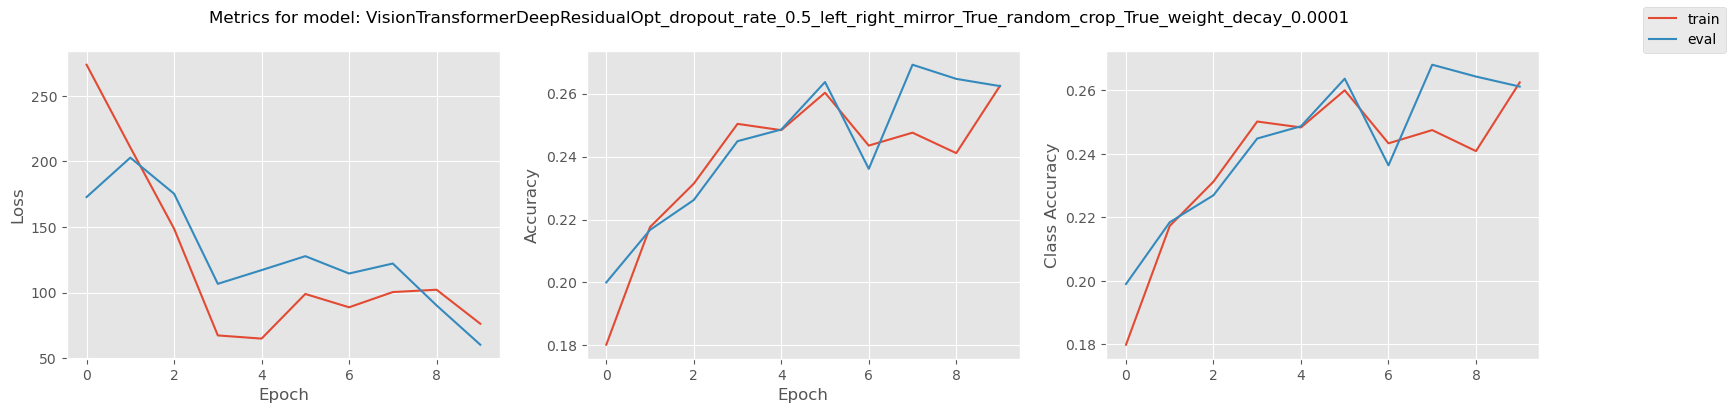

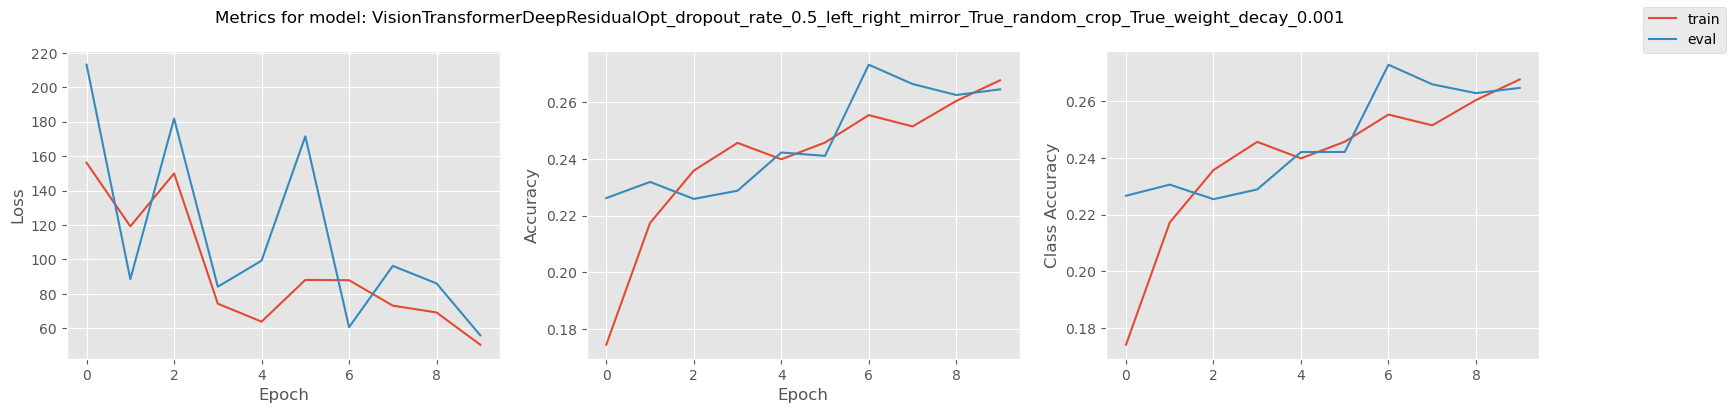

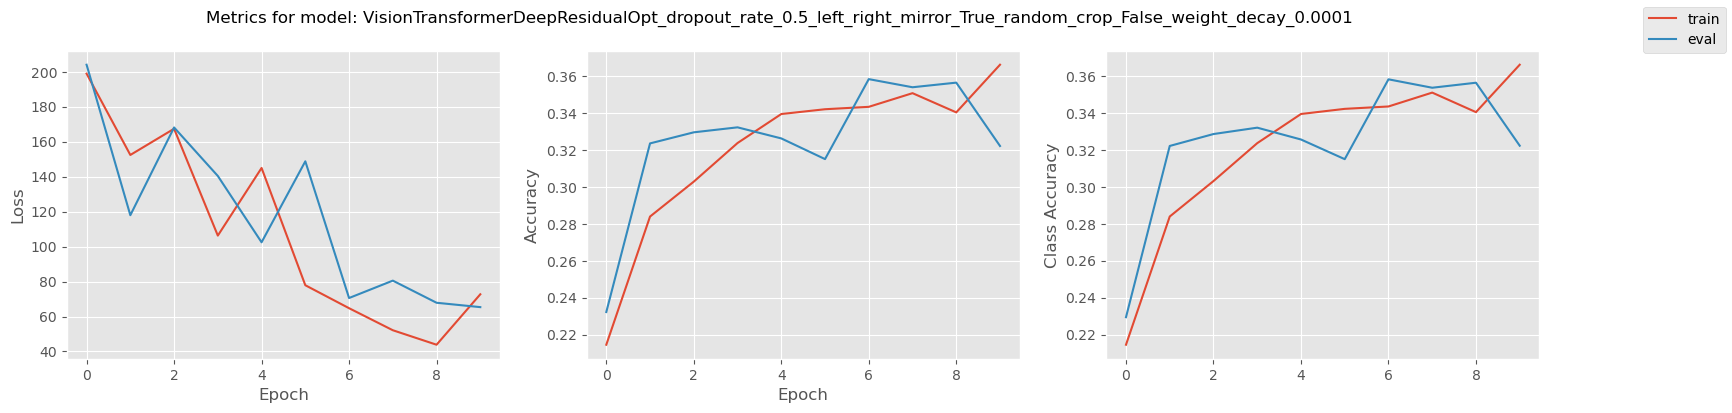

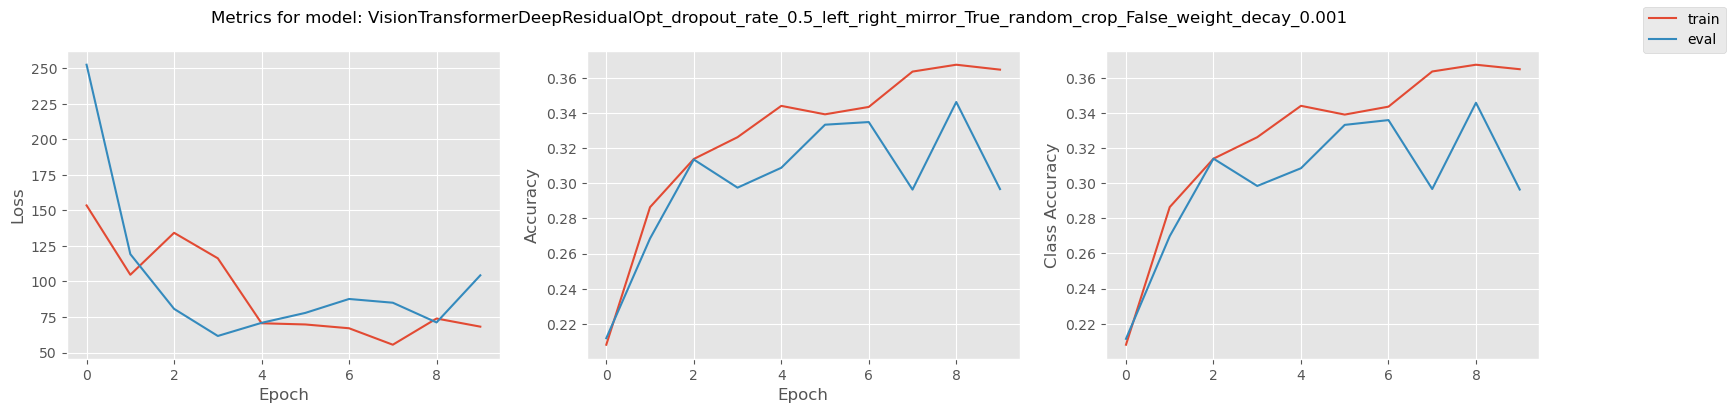

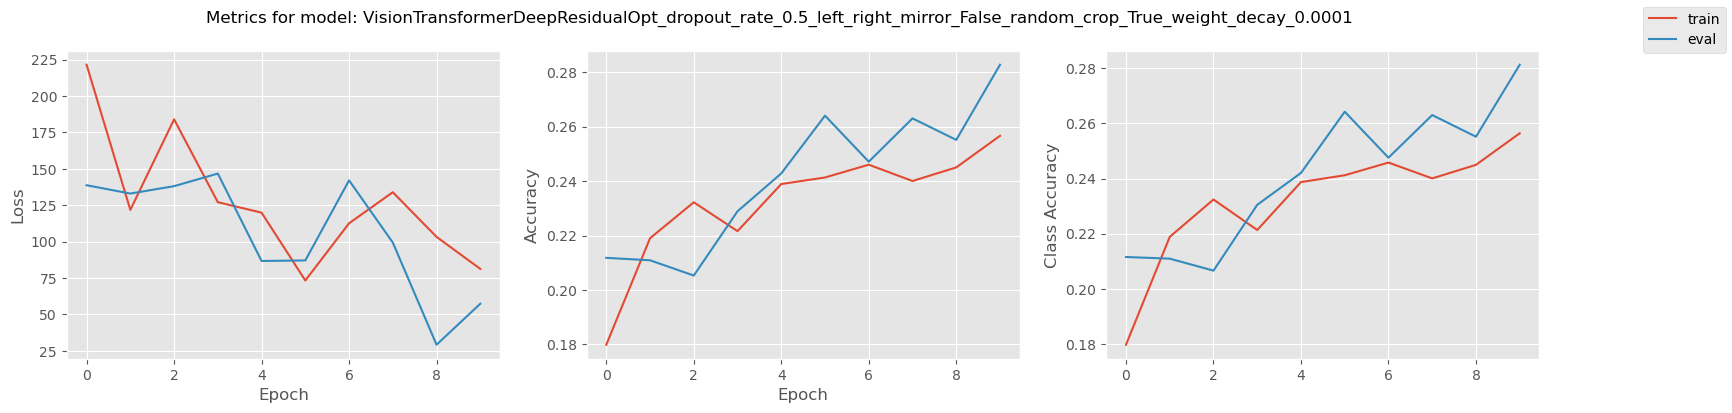

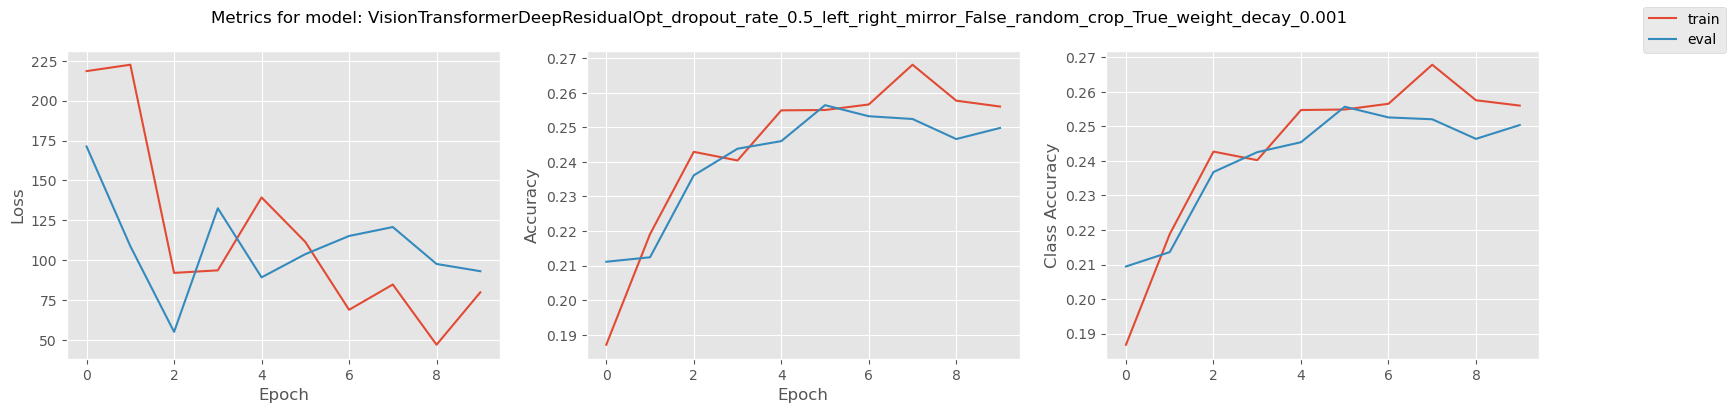

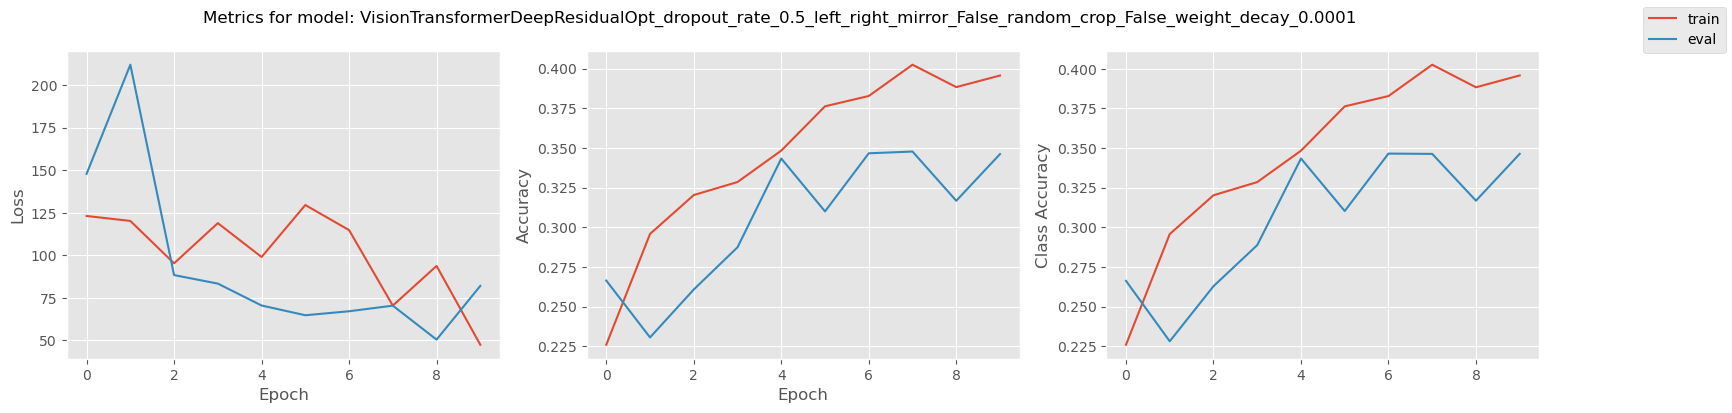

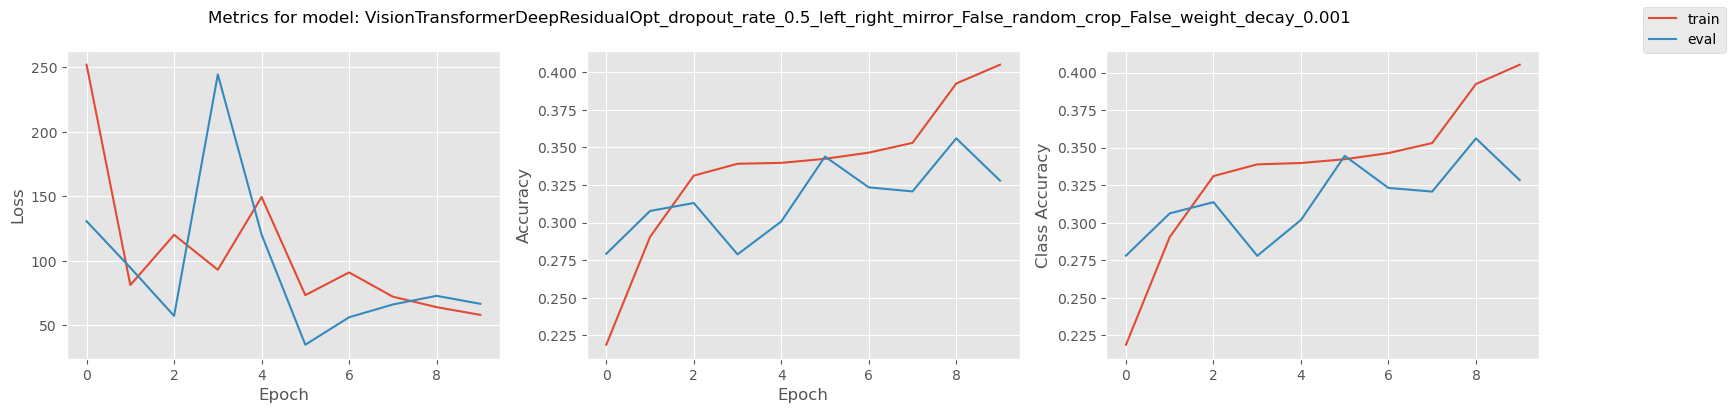

In [5]:
# Perform grid search for hyperparameter optimization

best_model_name = None
best_model = None
best_model_accuracy = 0.0
best_parameters = None

for i, params in enumerate(ParameterGrid(param_grid)):
        
    if params['random_crop'] == True and params['left_right_mirror'] == True:
        transform = v2.Compose([
            v2.ToImage(), 
            v2.RandomHorizontalFlip(),
            v2.RandomCrop(32, padding=4),
            v2.ToDtype(torch.float32, scale=True),
            v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
        ])
    elif params['random_crop'] == True and params['left_right_mirror'] == False:
        transform = v2.Compose([
            v2.ToImage(), 
            v2.RandomCrop(32, padding=4),
            v2.ToDtype(torch.float32, scale=True),
            v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
        ])
    elif params['random_crop'] == False and params['left_right_mirror'] == True:
        transform = v2.Compose([
            v2.ToImage(), 
            v2.RandomHorizontalFlip(),
            v2.ToDtype(torch.float32, scale=True),
            v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
        ])
    else:
        transform = v2.Compose([
            v2.ToImage(),
            v2.ToDtype(torch.float32, scale=True),
            v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
        ])

    train_data_opt, val_data_opt, test_data_opt = cifar_load(transform)

    model = VisionTransformerDeepResidualOpt(dropout_rate=params['dropout_rate'])

    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=params['weight_decay'])

    print(f'\n\n{i+1}/{len(ParameterGrid(param_grid))} Training model with hyperparameters: {params}')

    name = model.__class__.__name__

    for param in params:
        name += "_"+param + "_" + str(params[param])

    trainer = train_model_opt(model, optimizer, name, train_data_opt, val_data_opt)

    trainer.train()

    save_metrics(trainer, model.__class__.__name__, params)

    model, test_metric = test_model(model, params, test_data_opt)

    plot_metrics(trainer, name)

    if test_metric.accuracy() > best_model_accuracy:
        best_model_accuracy = test_metric.accuracy()
        best_parameters = params
        best_model = model
        best_model_name = name

print("Model:", best_model_name)
print("Best model found with parameters:", best_parameters)
print("Best test accuracy:", best_model_accuracy)
